# Inisialisasi


```
# manggil library ajasih
```




In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import matplotlib.mlab as mlab


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')


url = 'https://raw.githubusercontent.com/hasobi/skripsi/master/dataset/KDDTrain%2B_v1.csv'

In [0]:
# df = pd.read_csv('/content/drive/My Drive/Tugas Akhir a.k.a SKRIPSI/dataset/KDDTrain+_v1.csv')

df = pd.read_csv(url)

In [0]:
data = df

In [0]:
# dicitionary untuk merubah tipe serangan menjadi lebih umum seperti Normal, DoS, Probe, U2R, dan R2L

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

data.replace(attack_dict, inplace = True)

In [413]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


In [414]:
data.shape

(125972, 43)

# Durasi

In [415]:
duration = data['duration'] 
attack = data['type_attack']

duration.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: duration, dtype: int64

In [416]:
data1 = pd.concat([duration, attack], axis=1)

data1.head(10)

,duration,type_attack
0,0,normal
1,0,dos
2,0,normal
3,0,normal
4,0,dos
5,0,dos
6,0,dos
7,0,dos
8,0,dos
9,0,dos


In [417]:
normal_only = data1[data1.type_attack == 'normal']
dos_only = data1[data1.type_attack == 'dos']
probe_only =  data1[data1.type_attack == 'probe']
u2r_only = data1[data1.type_attack == 'u2r']
r2l_only = data1[data1.type_attack == 'r2l']

normal_only.head(10)

,duration,type_attack
0,0,normal
2,0,normal
3,0,normal
11,0,normal
15,0,normal
17,0,normal
18,0,normal
21,0,normal
22,5607,normal
24,507,normal


In [418]:
sort_normal = normal_only.sort_values('duration', ascending=True)
sort_dos = dos_only.sort_values('duration', ascending=True)
sort_probe = probe_only.sort_values('duration', ascending=True)
sort_u2r = u2r_only.sort_values('duration', ascending=True)
sort_r2l = r2l_only.sort_values('duration', ascending=True)

sort_normal.head()

,duration,type_attack
0,0,normal
81578,0,normal
81581,0,normal
81582,0,normal
81583,0,normal


In [0]:
count_normal = sort_normal['duration'].value_counts()
count_dos = sort_dos['duration'].value_counts()
count_probe = sort_probe['duration'].value_counts()
count_u2r = sort_u2r['duration'].value_counts()
count_r2l = sort_r2l['duration'].value_counts()

In [0]:
data2 = pd.concat([count_normal, count_dos, count_probe, count_u2r, count_r2l], axis = 1)
data2.columns =['normal','dos','probe','u2r','r2l']


# data2

In [0]:
data2 = data2.fillna(0)
index = data2.index.to_frame()
data3= pd.concat([data2, index], axis=1)

In [0]:
data3 = data3.rename(columns={0: 'value'})

In [423]:
data3.head()

,normal,dos,probe,u2r,r2l,value
0,59385.0,45886.0,10060.0,15.0,608.0,0
1,1648.0,7.0,196.0,0.0,138.0,1
2,717.0,4.0,70.0,0.0,52.0,2
3,479.0,0.0,73.0,0.0,5.0,3
4,278.0,2.0,38.0,0.0,33.0,4


In [424]:
data3.shape

(2981, 6)

In [425]:
data4 = data3[1:21]

data4

,normal,dos,probe,u2r,r2l,value
1,1648.0,7.0,196.0,0.0,138.0,1
2,717.0,4.0,70.0,0.0,52.0,2
3,479.0,0.0,73.0,0.0,5.0,3
4,278.0,2.0,38.0,0.0,33.0,4
5,277.0,3.0,17.0,0.0,1.0,5
6,141.0,2.0,47.0,0.0,3.0,6
7,105.0,4.0,16.0,2.0,0.0,7
8,79.0,3.0,15.0,0.0,1.0,8
9,78.0,3.0,7.0,0.0,7.0,9
10,109.0,2.0,5.0,0.0,8.0,10


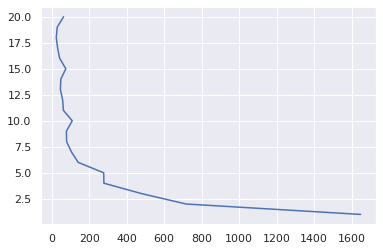

In [426]:
plt.plot(data4['normal'], data4['value'])

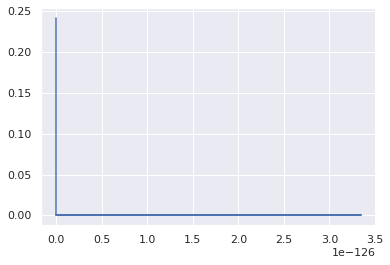

In [427]:
plt.plot(norm.pdf(data4['normal']), norm.pdf(data4['value']))

In [428]:
data3.head()

,normal,dos,probe,u2r,r2l,value
0,59385.0,45886.0,10060.0,15.0,608.0,0
1,1648.0,7.0,196.0,0.0,138.0,1
2,717.0,4.0,70.0,0.0,52.0,2
3,479.0,0.0,73.0,0.0,5.0,3
4,278.0,2.0,38.0,0.0,33.0,4


Text(0.5, 1.0, 'durasi')

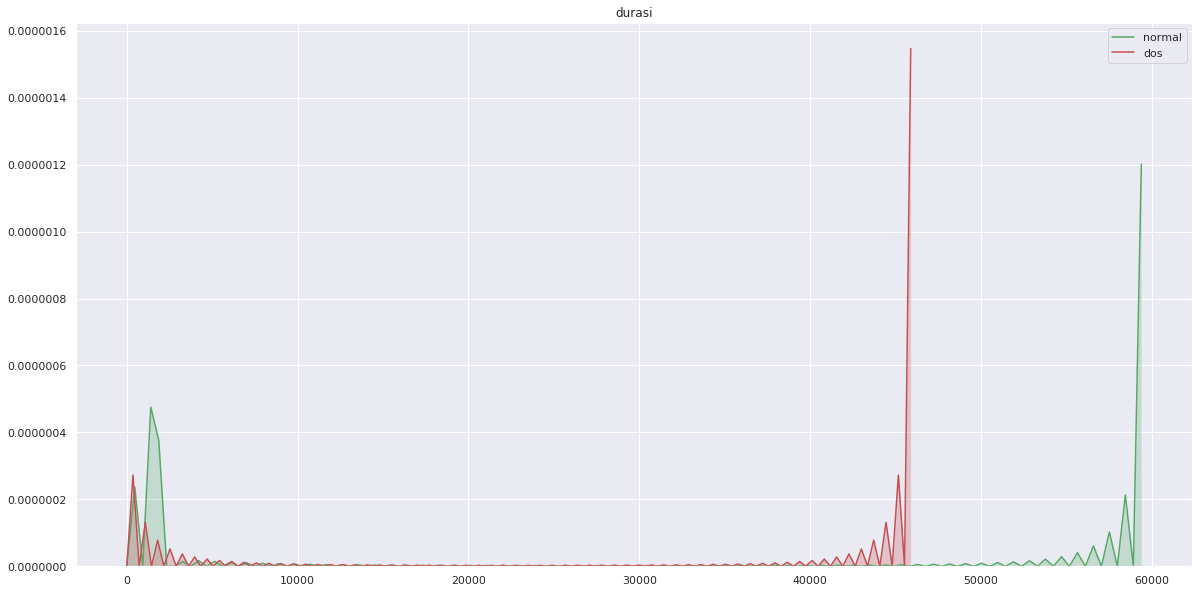

In [429]:
plt.figure(figsize=(20,10))


ax =  sns.kdeplot(data3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data3['dos'], shade=True, color="r")
plt.title('durasi')

Text(0.5, 1.0, 'durtasi tanpa PDF')

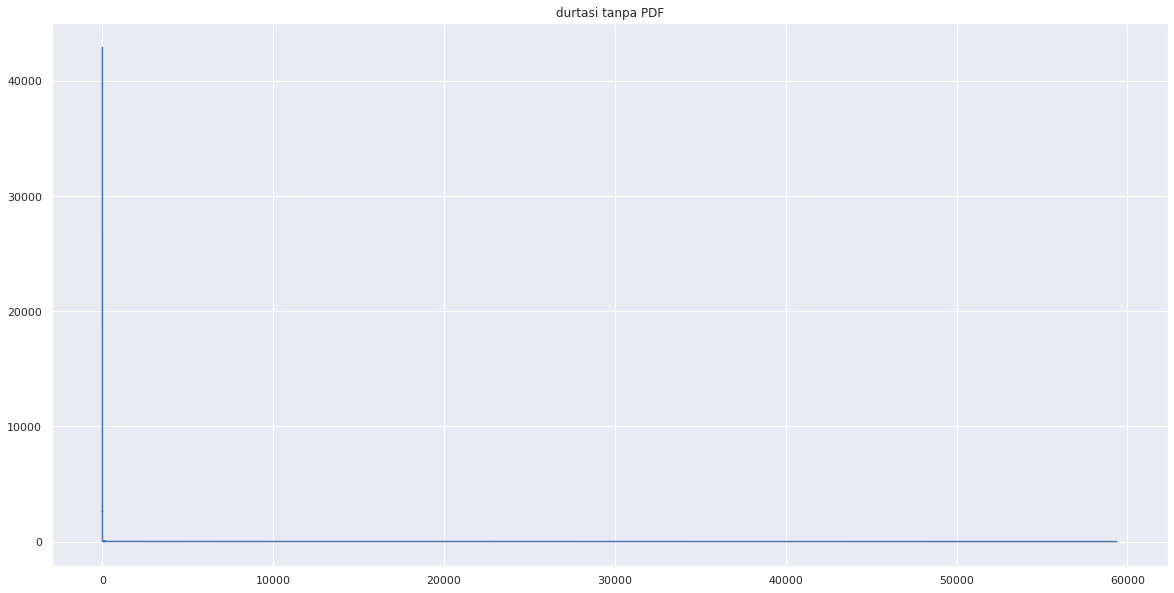

In [430]:
plt.figure(figsize=(20,10))


plt.plot(data3['normal'], data3['value'])
plt.title('durtasi tanpa PDF')

# Plot per atribut



```
# PLOT SETELAH BIMBINGAN 14 Oktober 2019
```



In [431]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


# Duration

In [0]:
# duration

In [0]:
duration = data['duration'] 
attack = data['type_attack']

In [434]:
duration.head()

0    0
1    0
2    0
3    0
4    0
Name: duration, dtype: int64

Text(0.5, 1.0, 'duration')

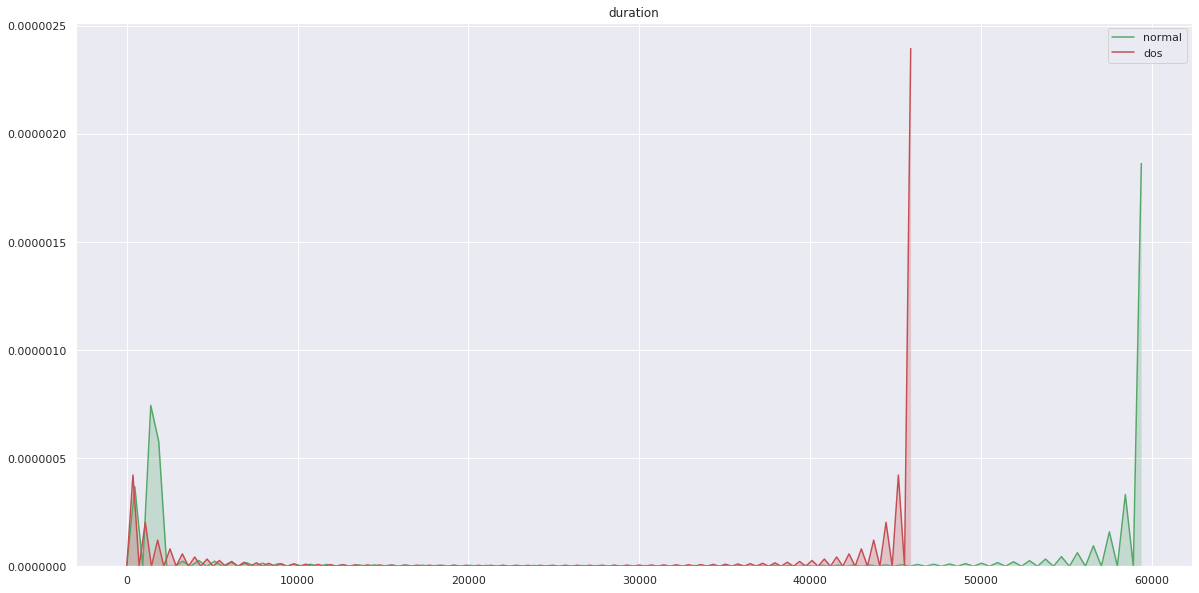

In [435]:
duration = data['duration']
attack = data['type_attack']


data_duration = pd.concat([duration, attack], axis=1)

normal_duration = data_duration[data_duration.type_attack == 'normal']
dos_duration= data_duration[data_duration.type_attack == 'dos']


sort_normal_duration = normal_duration.sort_values('duration', ascending=True)
sort_dos_duration = dos_duration.sort_values('duration', ascending=True)


count_normal_duration = sort_normal_duration['duration'].value_counts()
count_dos_duration = sort_dos_duration['duration'].value_counts()


data_duration2 = pd.concat([count_normal_duration, count_dos_duration], axis = 1)
data_duration2.columns =['normal','dos']


data_duration2 = data_duration2.fillna(0)
index = data_duration2.index.to_frame()
data_duration3 = pd.concat([data_duration2, index], axis=1)


data_duration3 = data_duration3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_duration3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_duration3['dos'], shade=True, color="r")
plt.title('duration')

In [436]:
data_duration3

,normal,dos,value
0,59385,45886.0,0
1,1648,7.0,1
2,717,4.0,2
3,479,0.0,3
4,278,2.0,4
...,...,...,...
29505,1,0.0,29505
32442,1,0.0,32442
32527,1,0.0,32527
32637,1,0.0,32637


# protocol_type

In [0]:
# protocol_type

In [0]:
protocol_type = data['protocol_type']
attack = data['type_attack']

In [439]:
protocol_type.unique()

array(['udp', 'tcp', 'icmp'], dtype=object)

In [0]:
protocol_dict ={
    "udp" : 0,
    "tcp" : 1,
    "icmp": 2
}

In [0]:
protocol_type.replace(protocol_dict, inplace = True)


Text(0.5, 1.0, 'protocol_type')

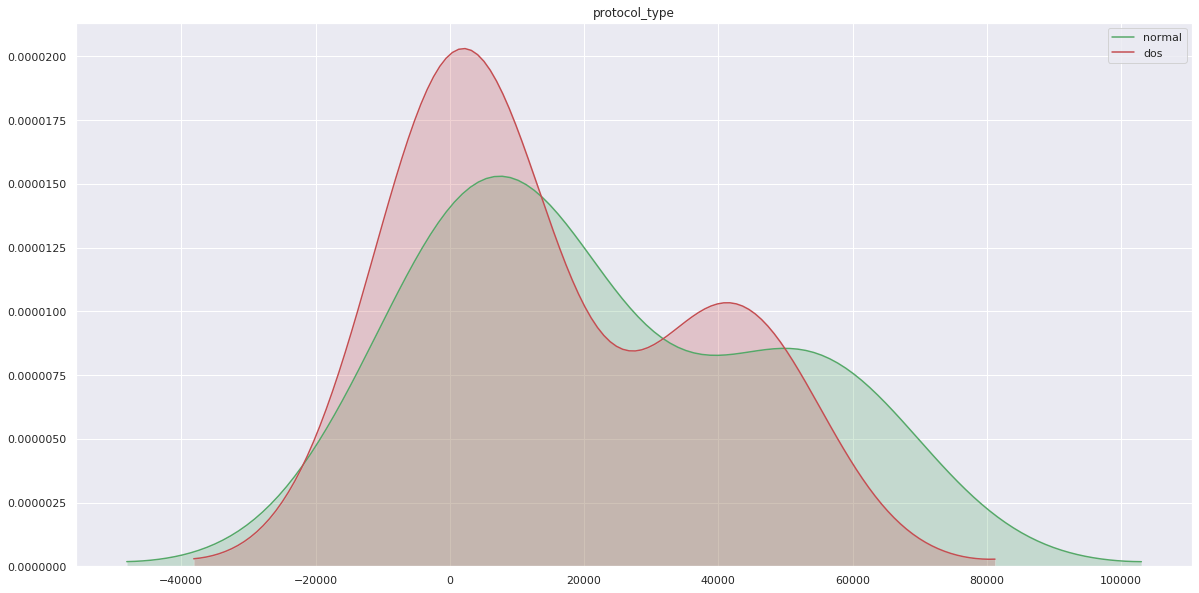

In [442]:
data_protocol_type = pd.concat([protocol_type, attack], axis=1)

normal_protocol_type = data_protocol_type[data_protocol_type.type_attack == 'normal']
dos_protocol_type= data_protocol_type[data_protocol_type.type_attack == 'dos']


sort_normal_protocol_type = normal_protocol_type.sort_values('protocol_type', ascending=True)
sort_dos_protocol_type = dos_protocol_type.sort_values('protocol_type', ascending=True)


count_normal_protocol_type = sort_normal_protocol_type['protocol_type'].value_counts()
count_dos_protocol_type = sort_dos_protocol_type['protocol_type'].value_counts()


data_protocol_type2 = pd.concat([count_normal_protocol_type, count_dos_protocol_type], axis = 1)
data_protocol_type2.columns =['normal','dos']


data_protocol_type2 = data_protocol_type2.fillna(0)
index = data_protocol_type2.index.to_frame()
data_protocol_type3 = pd.concat([data_protocol_type2, index], axis=1)


data_protocol_type3 = data_protocol_type3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_protocol_type3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_protocol_type3['dos'], shade=True, color="r")
plt.title('protocol_type')

# service

In [443]:
# service
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,0,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,1,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,1,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,1,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,1,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


In [0]:
service = data['service']
attack = data['type_attack']

In [445]:
data_service = pd.concat([service, attack], axis=1)

data_service.head()

,service,type_attack
0,other,normal
1,private,dos
2,http,normal
3,http,normal
4,private,dos


In [0]:
service_dict={
    "Z39_50" : 0,
    "X11" : 1,
    "whois" : 2,
    "vmnet" : 3,
    "uucp_path" : 4,
    "uucp" : 5,
    "urp_i" : 6,
    "urh_i" : 7,
    "time" : 8,
    "tim_i" : 9,
    "tftp_u" : 10,
    "telnet" : 11,
    "systat" : 12,
    "supdup" : 13,
    "sunrpc" : 14,
    "ssh" : 15,
    "sql_net" : 16,
    "smtp" : 17,
    "shell" : 18,
    "rje" : 19,
    "remote_job" : 20,
    "red_i" : 21,
    "private" : 22,
    "printer" : 23,
    "pop_3" : 24,
    "pop_2" : 25,
    "pm_dump" : 26,
    "other" : 27,
    "ntp_u" : 28,
    "nntp" : 29,
    "nnsp" : 30,
    "netstat" : 31,
    "netbios_ssn" : 32,
    "netbios_ns" : 33,
    "netbios_dgm" : 34,
    "name" : 35,
    "mtp" : 36,
    "login" : 37,
    "link" : 38,
    "ldap" : 39,
    "kshell" : 40,
    "klogin" : 41,
    "iso_tsap" : 42,
    "IRC" : 43,
    "imap4" : 44,
    "http_8001" : 45,
    "http_443" : 46,
    "http_2784" : 47,
    "http" : 48,
    "hostnames" : 49,
    "harvest" : 50,
    "gopher" : 51,
    "ftp_data" : 52,
    "ftp" : 53,
    "finger" :  54,
    "exec" : 55,
    "efs" : 56,
    "ecr_i" : 57,
    "eco_i" : 58,
    "echo" : 59,
    "domain_u" : 60,
    "domain" : 61,
    "discard" : 62,
    "daytime" : 63,
    "ctf" : 64,
    "csnet_ns" : 65,
    "courier" : 66,
    "bgp" : 67,
    "auth" : 68,
    "aol" : 69

}
data_service.replace(service_dict, inplace = True)

In [447]:
data_service.head()

,service,type_attack
0,27,normal
1,22,dos
2,48,normal
3,48,normal
4,22,dos


In [448]:
normal_only = data_service[data_service.type_attack == 'normal']
dos_only = data_service[data_service.type_attack == 'dos']

normal_only.head()

,service,type_attack
0,27,normal
2,48,normal
3,48,normal
11,48,normal
15,48,normal


In [0]:
sort_normal = normal_only.sort_values('service', ascending=True)
sort_dos = dos_only.sort_values('service', ascending=True)

In [0]:
count_normal = sort_normal['service'].value_counts()
count_dos = sort_dos['service'].value_counts()

In [0]:
data2 = pd.concat([count_normal, count_dos], axis = 1)
data2.columns =['normal','dos']

In [0]:
data2 = data2.fillna(0)
index = data2.index.to_frame()
data3= pd.concat([data2, index], axis=1)

In [0]:
data3 = data3.rename(columns={0: 'value'})

In [454]:
data3.head()

,normal,dos,value
0,0.0,851.0,0
1,67.0,0.0,1
2,0.0,670.0,2
3,0.0,606.0,3
4,0.0,676.0,4


Text(0.5, 1.0, 'service')

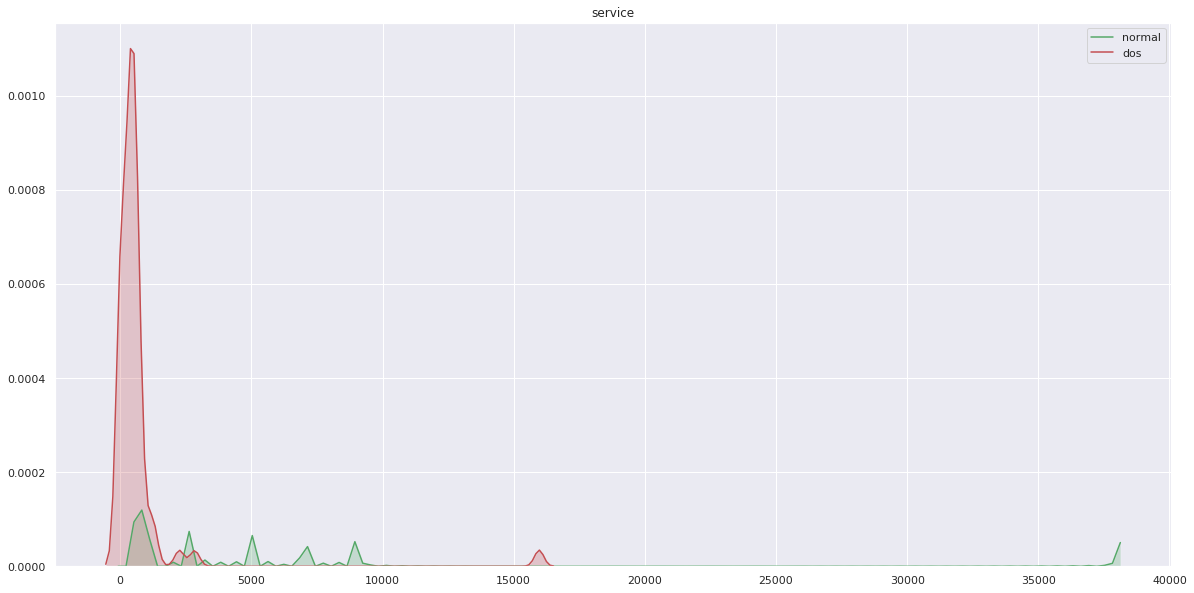

In [455]:
plt.figure(figsize=(20,10))


ax =  sns.kdeplot(data3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data3['dos'], shade=True, color="r")
plt.title('service')

# flag

In [456]:
# flag
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,0,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,1,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,1,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,1,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,1,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


In [0]:
flag = data['flag']
attack = data['type_attack']

In [458]:
data_flag = pd.concat([flag, attack], axis=1)

data_flag.head()

,flag,type_attack
0,SF,normal
1,S0,dos
2,SF,normal
3,SF,normal
4,REJ,dos


In [0]:
flag_dict={
    "SH" : 0,
    "SF" : 1,
    "S3" : 2,
    "S2" : 3,
    "S1" : 4,
    "S0" : 5,
    "RSTR" : 6,
    "RSTOS0" : 7,
    "RSTO" : 8,
    "REJ" : 9,
    "OTH" : 10

}

data_flag.replace(flag_dict, inplace = True)

In [460]:
normal_only = data_flag[data_flag.type_attack == 'normal']
dos_only = data_flag[data_flag.type_attack == 'dos']

normal_only.head()

,flag,type_attack
0,1,normal
2,1,normal
3,1,normal
11,1,normal
15,1,normal


In [0]:
sort_normal = normal_only.sort_values('flag', ascending=True)
sort_dos = dos_only.sort_values('flag', ascending=True)

In [0]:
count_normal = sort_normal['flag'].value_counts()
count_dos = sort_dos['flag'].value_counts()

In [0]:
data2 = pd.concat([count_normal, count_dos], axis = 1)
data2.columns =['normal','dos']

In [0]:
data2 = data2.fillna(0)
index = data2.index.to_frame()
data3= pd.concat([data2, index], axis=1)

In [0]:
data3 = data3.rename(columns={0: 'value'})

Text(0.5, 1.0, 'flag')

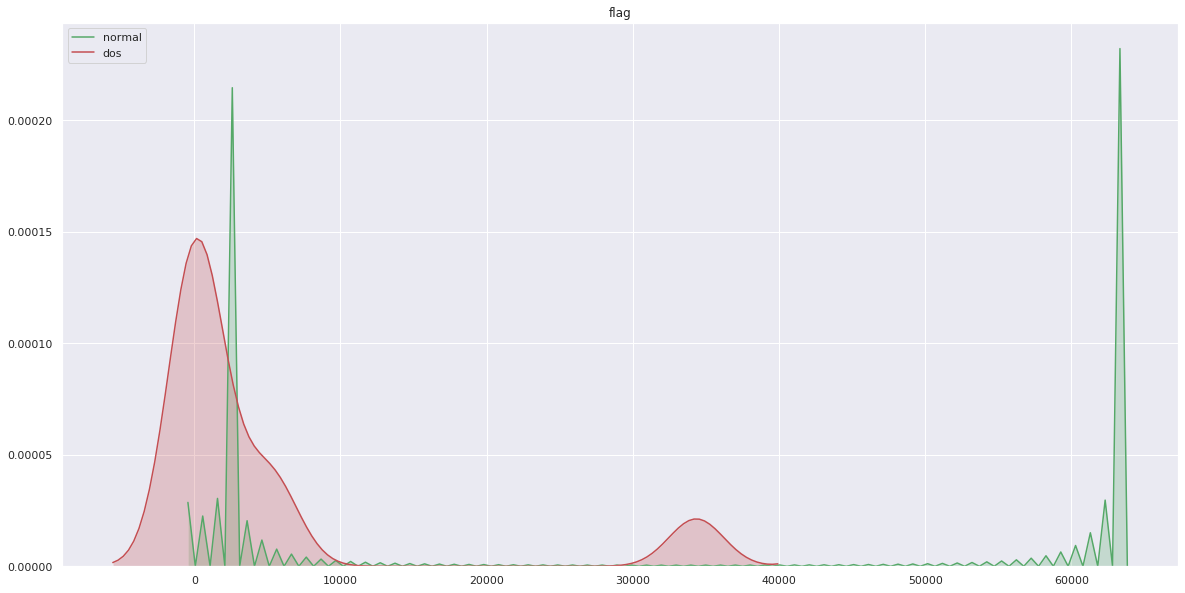

In [466]:
plt.figure(figsize=(20,10))


ax =  sns.kdeplot(data3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data3['dos'], shade=True, color="r")
plt.title('flag')

# src_bytes

In [467]:
# src_bytes	
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,0,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,1,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,1,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,1,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,1,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


Text(0.5, 1.0, 'src_bytes')

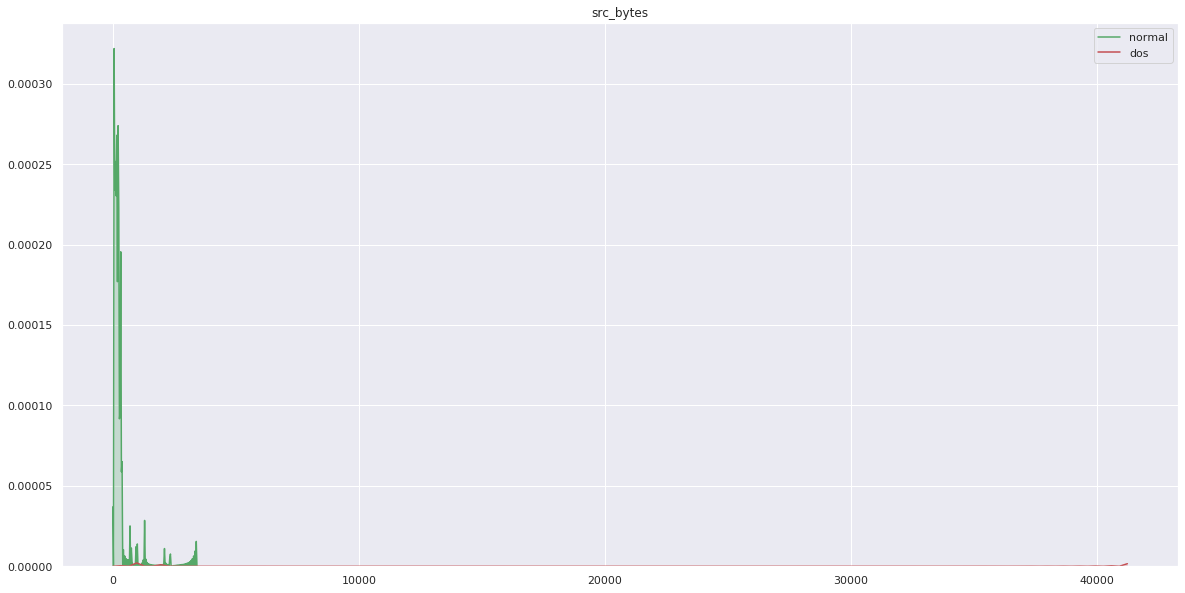

In [468]:
src_bytes = data['src_bytes']
attack = data['type_attack']


data_src_bytes = pd.concat([src_bytes, attack], axis=1)

normal_src_bytes = data_src_bytes[data_src_bytes.type_attack == 'normal']
dos_src_bytes= data_src_bytes[data_src_bytes.type_attack == 'dos']


sort_normal_src_bytes = normal_src_bytes.sort_values('src_bytes', ascending=True)
sort_dos_src_bytes = dos_src_bytes.sort_values('src_bytes', ascending=True)


count_normal_src_bytes = sort_normal_src_bytes['src_bytes'].value_counts()
count_dos_src_bytes = sort_dos_src_bytes['src_bytes'].value_counts()


data_src_bytes2 = pd.concat([count_normal_src_bytes, count_dos_src_bytes], axis = 1)
data_src_bytes2.columns =['normal','dos']


data_src_bytes2 = data_src_bytes2.fillna(0)
index = data_src_bytes2.index.to_frame()
data_src_bytes3 = pd.concat([data_src_bytes2, index], axis=1)


data_src_bytes3 = data_src_bytes3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_src_bytes3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_src_bytes3['dos'], shade=True, color="r")
plt.title('src_bytes')

# dst_bytes

In [469]:
# dst_bytes

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,0,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,1,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,1,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,1,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,1,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


In [0]:
dst_bytes =  data['dst_bytes']
attack = data['type_attack']

In [471]:
data_dst_bytes = pd.concat([dst_bytes, attack], axis=1)

data_dst_bytes.head()

,dst_bytes,type_attack
0,0,normal
1,0,dos
2,8153,normal
3,420,normal
4,0,dos


In [472]:
normal_dst_bytes = data_dst_bytes[data_dst_bytes.type_attack == 'normal']
dos_dst_bytes = data_dst_bytes[data_dst_bytes.type_attack == 'dos']

normal_dst_bytes.head()

,dst_bytes,type_attack
0,0,normal
2,8153,normal
3,420,normal
11,2251,normal
15,13788,normal


In [0]:
sort_normal_dst_bytes = normal_dst_bytes.sort_values('dst_bytes', ascending=True)
sort_dos_dst_bytes = dos_dst_bytes.sort_values('dst_bytes', ascending=True)

In [0]:
count_normal_dst_bytes = sort_normal_dst_bytes['dst_bytes'].value_counts()
count_dos_dst_bytes = sort_dos_dst_bytes['dst_bytes'].value_counts()

In [0]:
data_dst_bytes = pd.concat([count_normal_dst_bytes, count_dos_dst_bytes], axis = 1)
data_dst_bytes.columns =['normal','dos']

In [0]:
data_dst_bytes = data_dst_bytes.fillna(0)
index = data_dst_bytes.index.to_frame()
data_dst_bytes2 = pd.concat([data_dst_bytes, index], axis=1)

In [0]:
data_dst_bytes2 = data_dst_bytes2.rename(columns={0: 'value'})

Text(0.5, 1.0, 'dst_bytes')

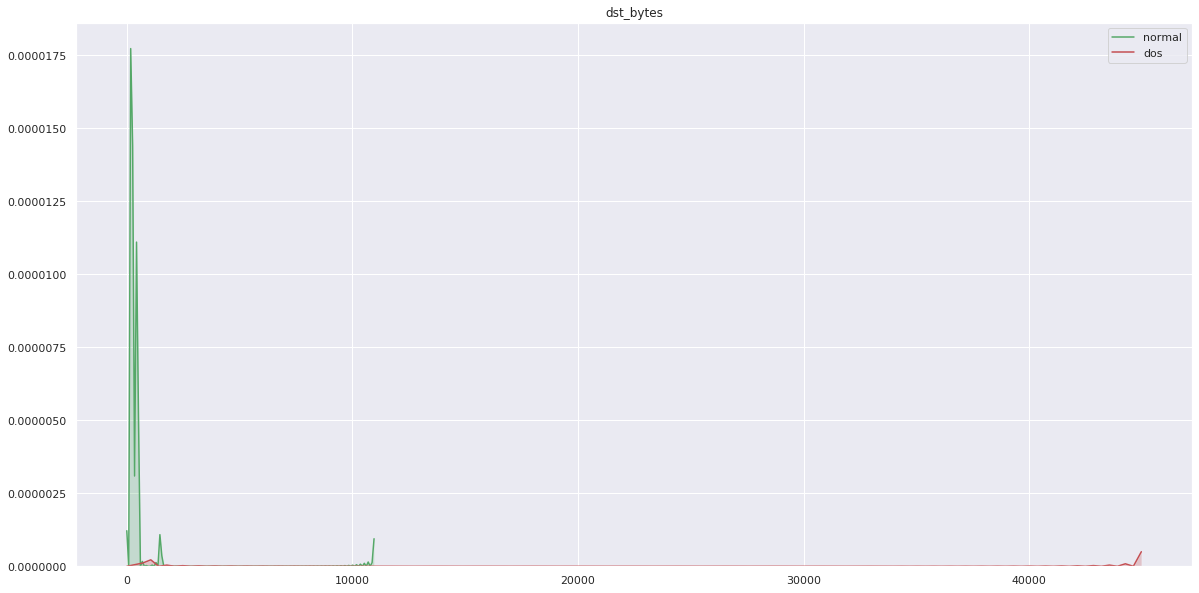

In [478]:
plt.figure(figsize=(20,10))


ax =  sns.kdeplot(data_dst_bytes2['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_dst_bytes2['dos'], shade=True, color="r")
plt.title('dst_bytes')

# land

In [479]:
# land

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,0,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,1,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,1,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,1,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,1,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


In [0]:
land = data['land']
attack = data['type_attack']

data_land = pd.concat([land, attack], axis=1)

In [481]:
normal_land = data_land[data_land.type_attack == 'normal']
dos_land = data_land[data_land.type_attack == 'dos']

normal_land.head()

,land,type_attack
0,0,normal
2,0,normal
3,0,normal
11,0,normal
15,0,normal


In [0]:
sort_normal_land = normal_land.sort_values('land', ascending=True)
sort_dos_land = dos_land.sort_values('land', ascending=True)

In [0]:
count_normal_land = sort_normal_land['land'].value_counts()
count_dos_land = sort_dos_land['land'].value_counts()

In [0]:
data_land2 = pd.concat([count_normal_land, count_dos_land], axis = 1)
data_land2.columns =['normal','dos']

In [0]:
data_land2 = data_land2.fillna(0)
index = data_land2.index.to_frame()
data_land3 = pd.concat([data_land2, index], axis=1)

In [486]:
data_land3.head()

,normal,dos,0
0,67335,45909,0
1,7,18,1


In [0]:
data_land3 = data_land3.rename(columns={0: 'value'})

Text(0.5, 1.0, 'land')

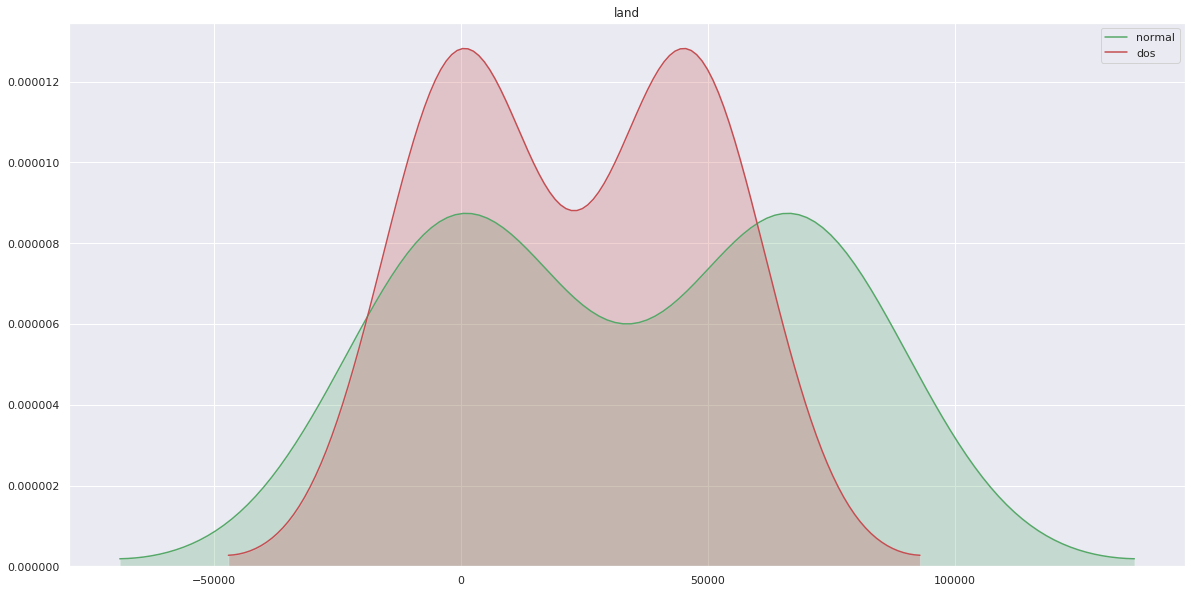

In [488]:
plt.figure(figsize=(20,10))


ax =  sns.kdeplot(data_land3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_land3['dos'], shade=True, color="r")
plt.title('land')

# wrong_fragment

In [489]:
# wrong_fragment	

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,0,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,1,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,1,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,1,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,1,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


Text(0.5, 1.0, 'wrong_fragment')

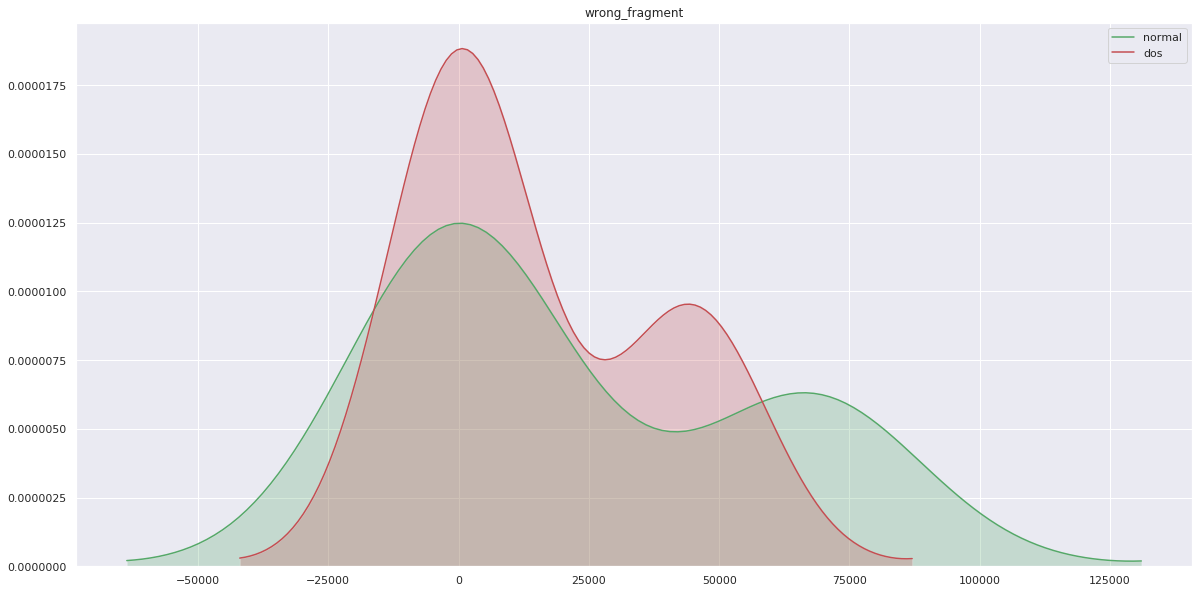

In [490]:
data_wrong_fragment = data[['wrong_fragment', 'type_attack']]

normal_wrong_fragment = data_wrong_fragment[data_wrong_fragment.type_attack == 'normal']
dos_wrong_fragment= data_wrong_fragment[data_wrong_fragment.type_attack == 'dos']


sort_normal_wrong_fragment = normal_wrong_fragment.sort_values('wrong_fragment', ascending=True)
sort_dos_wrong_fragment = dos_wrong_fragment.sort_values('wrong_fragment', ascending=True)


count_normal_wrong_fragment = sort_normal_wrong_fragment['wrong_fragment'].value_counts()
count_dos_wrong_fragment = sort_dos_wrong_fragment['wrong_fragment'].value_counts()


data_wrong_fragment2 = pd.concat([count_normal_wrong_fragment, count_dos_wrong_fragment], axis = 1)
data_wrong_fragment2.columns =['normal','dos']


data_wrong_fragment2 = data_wrong_fragment2.fillna(0)
index = data_wrong_fragment2.index.to_frame()
data_wrong_fragment3 = pd.concat([data_wrong_fragment2, index], axis=1)


data_wrong_fragment3 = data_wrong_fragment3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_wrong_fragment3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_wrong_fragment3['dos'], shade=True, color="r")
plt.title('wrong_fragment')

In [491]:
data_wrong_fragment3

,normal,dos,value
0,67342.0,44837,0
1,0.0,206,1
3,0.0,884,3


# urgent

In [0]:
# urgent

urgent = data['urgent']
attack= data['type_attack']

In [0]:
data_urgent = pd.concat([urgent, attack], axis=1)

In [494]:
normal_urgent = data_urgent[data_urgent.type_attack == 'normal']
dos_urgent= data_urgent[data_urgent.type_attack == 'dos']

normal_urgent.head()

,urgent,type_attack
0,0,normal
2,0,normal
3,0,normal
11,0,normal
15,0,normal


In [0]:
sort_normal_urgent = normal_urgent.sort_values('urgent', ascending=True)
sort_dos_urgent = dos_urgent.sort_values('urgent', ascending=True)

In [0]:
count_normal_urgent = sort_normal_urgent['urgent'].value_counts()
count_dos_urgent = sort_dos_urgent['urgent'].value_counts()

In [0]:
data_urgent2 = pd.concat([count_normal_urgent, count_dos_urgent], axis = 1)
data_urgent2.columns =['normal','dos']

In [0]:
data_urgent2 = data_urgent2.fillna(0)
index = data_urgent2.index.to_frame()
data_urgent3 = pd.concat([data_urgent2, index], axis=1)

In [0]:
data_urgent3 = data_urgent3.rename(columns={0: 'value'})

Text(0.5, 1.0, 'urgent')

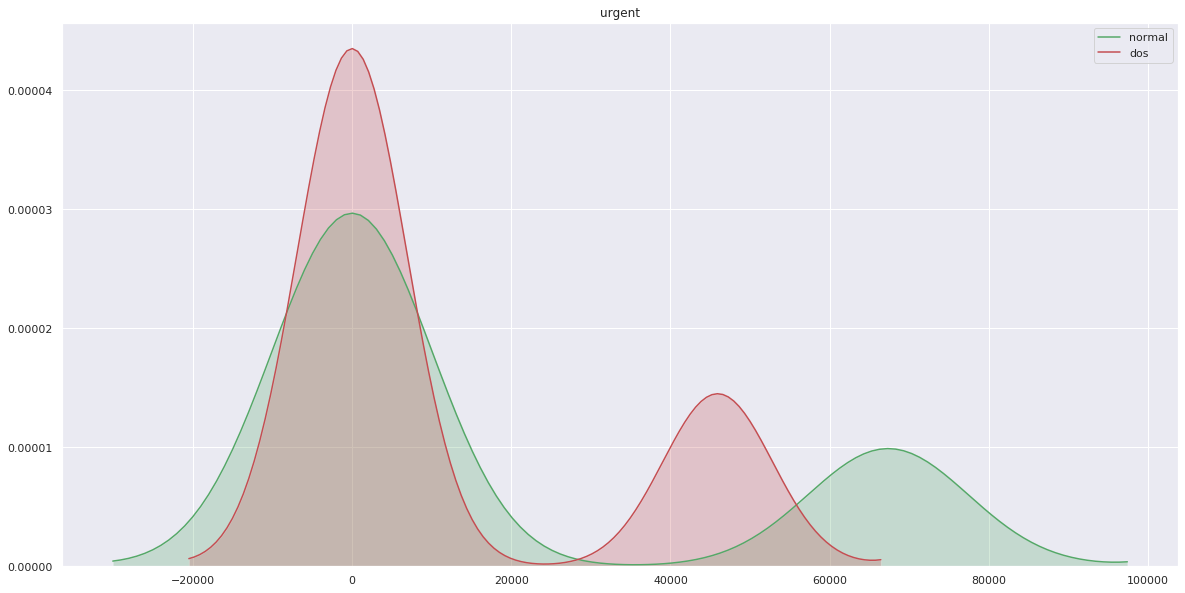

In [500]:
plt.figure(figsize=(20,10))


ax =  sns.kdeplot(data_urgent3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_urgent3['dos'], shade=True, color="r")
plt.title('urgent')

# hot

In [0]:
# hot

hot = data['hot']
attack = data['type_attack']

In [0]:
data_hot = pd.concat([hot, attack], axis=1)

In [503]:
normal_hot = data_hot[data_hot.type_attack == 'normal']
dos_hot= data_hot[data_hot.type_attack == 'dos']

normal_hot.head()

,hot,type_attack
0,0,normal
2,0,normal
3,0,normal
11,0,normal
15,0,normal


In [0]:
sort_normal_hot = normal_hot.sort_values('hot', ascending=True)
sort_dos_hot = dos_hot.sort_values('hot', ascending=True)

In [0]:
count_normal_hot = sort_normal_hot['hot'].value_counts()
count_dos_hot = sort_dos_hot['hot'].value_counts()

In [0]:
data_hot2 = pd.concat([count_normal_hot, count_dos_hot], axis = 1)
data_hot2.columns =['normal','dos']

In [0]:
data_hot2 = data_hot2.fillna(0)
index = data_hot2.index.to_frame()
data_hot3 = pd.concat([data_hot2, index], axis=1)

In [0]:
data_hot3 = data_hot3.rename(columns={0: 'value'})

Text(0.5, 1.0, 'urgent')

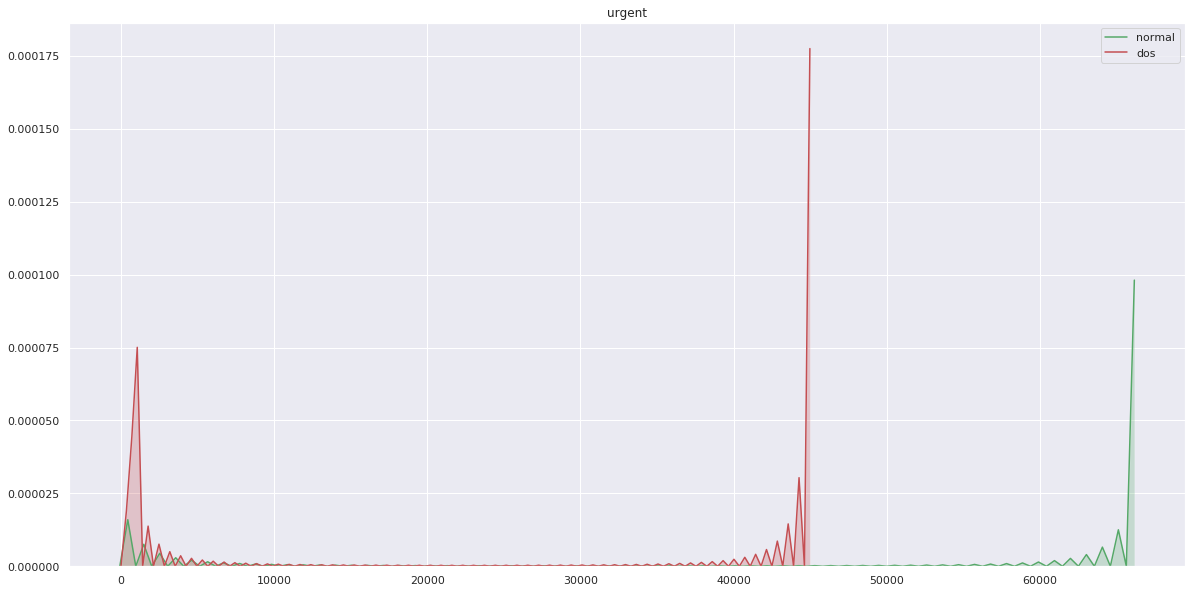

In [509]:
plt.figure(figsize=(20,10))


ax =  sns.kdeplot(data_hot3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_hot3['dos'], shade=True, color="r")
plt.title('urgent')

# num_failed_logins	

In [0]:
# num_failed_logins	

In [0]:
num_failed_logins	= data['num_failed_logins']
attack = data['type_attack']

In [0]:
data_num_failed_logins = pd.concat([num_failed_logins, attack], axis=1)

normal_num_failed_logins = data_num_failed_logins[data_num_failed_logins.type_attack == 'normal']
dos_num_failed_logins= data_num_failed_logins[data_num_failed_logins.type_attack == 'dos']


sort_normal_num_failed_logins = normal_num_failed_logins.sort_values('num_failed_logins', ascending=True)
sort_dos_num_failed_logins = dos_num_failed_logins.sort_values('num_failed_logins', ascending=True)


count_normal_num_failed_logins = sort_normal_num_failed_logins['num_failed_logins'].value_counts()
count_dos_num_failed_logins = sort_dos_num_failed_logins['num_failed_logins'].value_counts()


data_num_failed_logins2 = pd.concat([count_normal_num_failed_logins, count_dos_num_failed_logins], axis = 1)
data_num_failed_logins2.columns =['normal','dos']


data_num_failed_logins2 = data_num_failed_logins2.fillna(0)
index = data_num_failed_logins2.index.to_frame()
data_num_failed_logins3 = pd.concat([data_num_failed_logins2, index], axis=1)


data_num_failed_logins3 = data_num_failed_logins3.rename(columns={0: 'value'})

Text(0.5, 1.0, 'num_failed_logins')

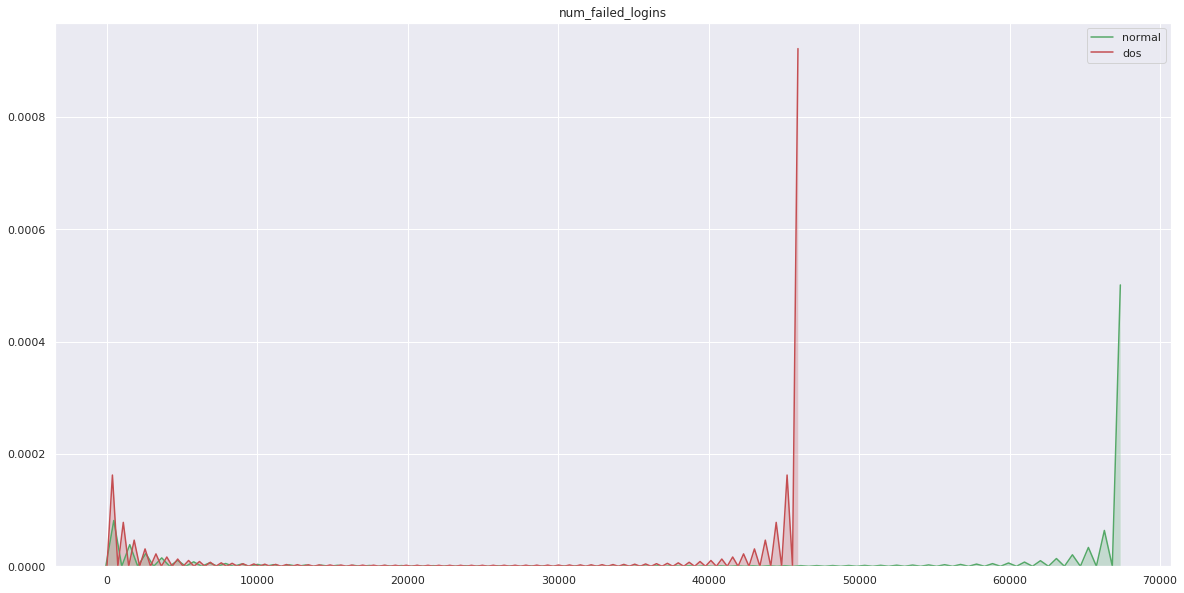

In [513]:
plt.figure(figsize=(20,10))


ax =  sns.kdeplot(data_num_failed_logins3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_num_failed_logins3['dos'], shade=True, color="r")
plt.title('num_failed_logins')

# logged_in

In [0]:
# logged_in

logged_in =  data['logged_in']
attack = data['type_attack']

In [0]:
data_logged_in = pd.concat([logged_in, attack], axis=1)

normal_logged_in = data_logged_in[data_logged_in.type_attack == 'normal']
dos_logged_in= data_logged_in[data_logged_in.type_attack == 'dos']


sort_normal_logged_in = normal_logged_in.sort_values('logged_in', ascending=True)
sort_dos_logged_in = dos_logged_in.sort_values('logged_in', ascending=True)


count_normal_logged_in = sort_normal_logged_in['logged_in'].value_counts()
count_dos_logged_in = sort_dos_logged_in['logged_in'].value_counts()


data_logged_in2 = pd.concat([count_normal_logged_in, count_dos_logged_in], axis = 1)
data_logged_in2.columns =['normal','dos']


data_logged_in2 = data_logged_in2.fillna(0)
index = data_logged_in2.index.to_frame()
data_logged_in3 = pd.concat([data_logged_in2, index], axis=1)


data_logged_in3 = data_logged_in3.rename(columns={0: 'value'})

Text(0.5, 1.0, 'logged_in')

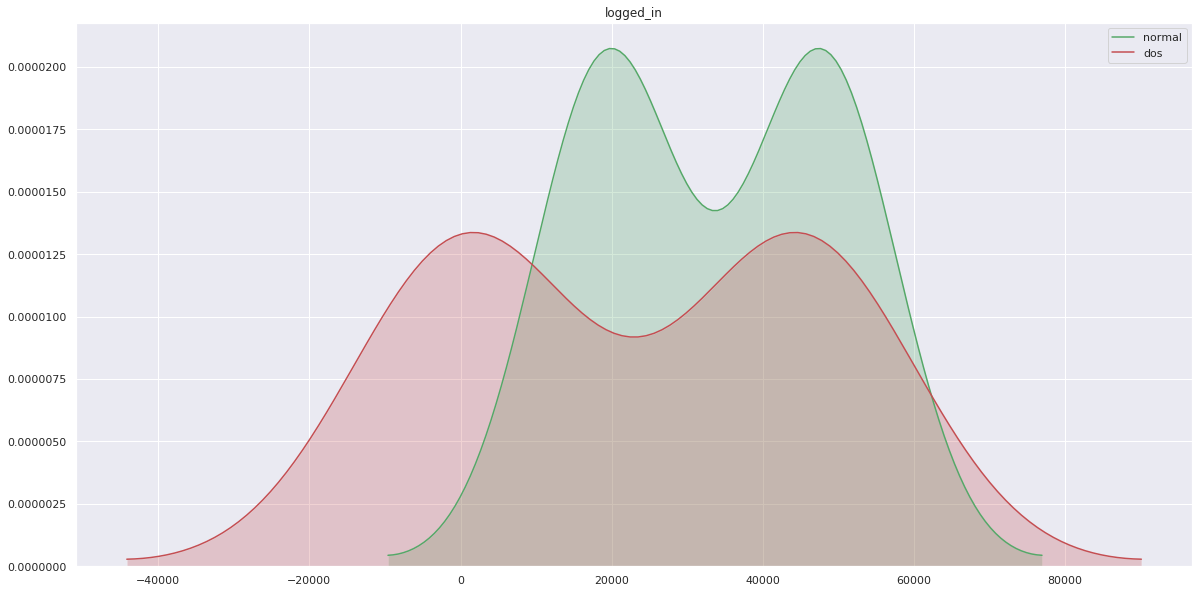

In [516]:
plt.figure(figsize=(20,10))


ax =  sns.kdeplot(data_logged_in3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_logged_in3['dos'], shade=True, color="r")
plt.title('logged_in')

# num_compromised	

In [0]:
# num_compromised	

In [0]:
num_compromised = data['num_compromised']
attack = data['type_attack']

In [0]:
data_num_compromised = pd.concat([num_compromised, attack], axis=1)

normal_num_compromised = data_num_compromised[data_num_compromised.type_attack == 'normal']
dos_num_compromised= data_num_compromised[data_num_compromised.type_attack == 'dos']


sort_normal_num_compromised = normal_num_compromised.sort_values('num_compromised', ascending=True)
sort_dos_num_compromised = dos_num_compromised.sort_values('num_compromised', ascending=True)


count_normal_num_compromised = sort_normal_num_compromised['num_compromised'].value_counts()
count_dos_num_compromised = sort_dos_num_compromised['num_compromised'].value_counts()


data_num_compromised2 = pd.concat([count_normal_num_compromised, count_dos_num_compromised], axis = 1)
data_num_compromised2.columns =['normal','dos']


data_num_compromised2 = data_num_compromised2.fillna(0)
index = data_num_compromised2.index.to_frame()
data_num_compromised3 = pd.concat([data_num_compromised2, index], axis=1)


data_num_compromised3 = data_num_compromised3.rename(columns={0: 'value'})


Text(0.5, 1.0, 'num_compromised')

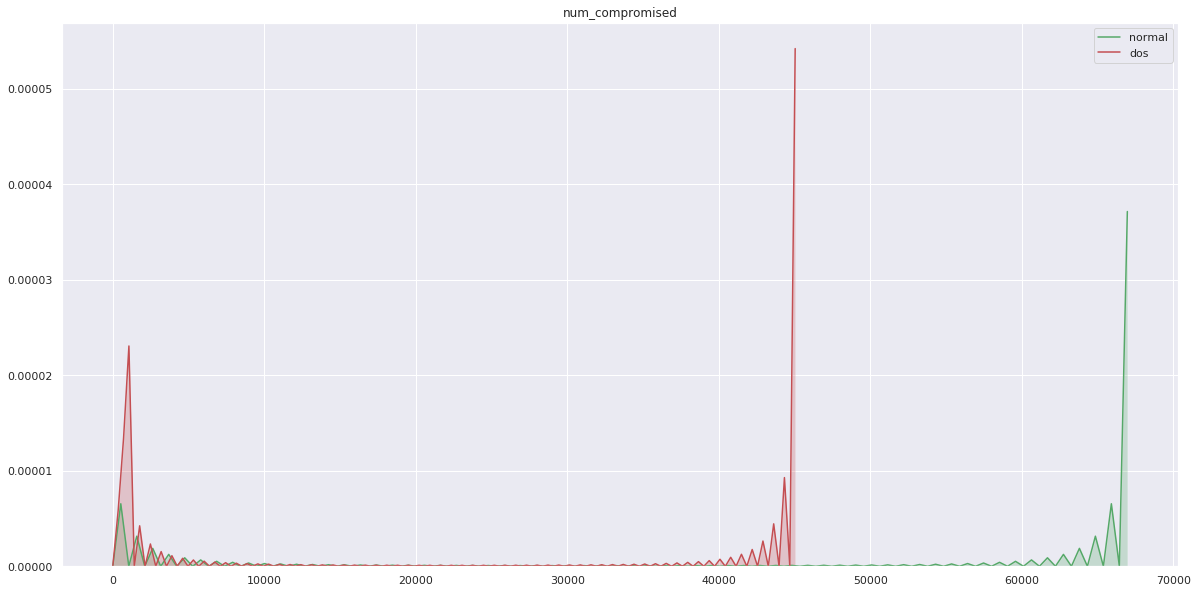

In [520]:
plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_num_compromised3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_num_compromised3['dos'], shade=True, color="r")
plt.title('num_compromised')

# root_shell	

In [0]:
# root_shell	

In [0]:
root_shell = data['root_shell']
attack = data['type_attack']

Text(0.5, 1.0, 'root_shell')

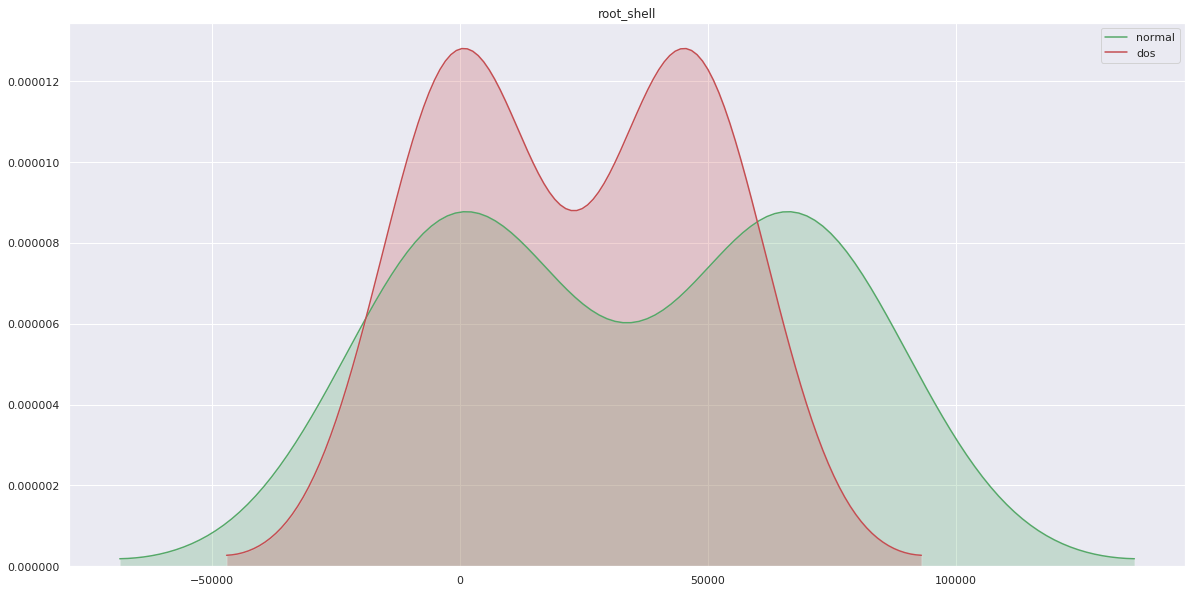

In [523]:
data_root_shell = pd.concat([root_shell, attack], axis=1)

normal_root_shell = data_root_shell[data_root_shell.type_attack == 'normal']
dos_root_shell= data_root_shell[data_root_shell.type_attack == 'dos']


sort_normal_root_shell = normal_root_shell.sort_values('root_shell', ascending=True)
sort_dos_root_shell = dos_root_shell.sort_values('root_shell', ascending=True)


count_normal_root_shell = sort_normal_root_shell['root_shell'].value_counts()
count_dos_root_shell = sort_dos_root_shell['root_shell'].value_counts()


data_root_shell2 = pd.concat([count_normal_root_shell, count_dos_root_shell], axis = 1)
data_root_shell2.columns =['normal','dos']


data_root_shell2 = data_root_shell2.fillna(0)
index = data_root_shell2.index.to_frame()
data_root_shell3 = pd.concat([data_root_shell2, index], axis=1)


data_root_shell3 = data_root_shell3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_root_shell3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_root_shell3['dos'], shade=True, color="r")
plt.title('root_shell')

# su_attempted	

In [0]:
# su_attempted	

In [0]:
su_attempted = data['su_attempted']
attack = data['type_attack']

Text(0.5, 1.0, 'su_attempted')

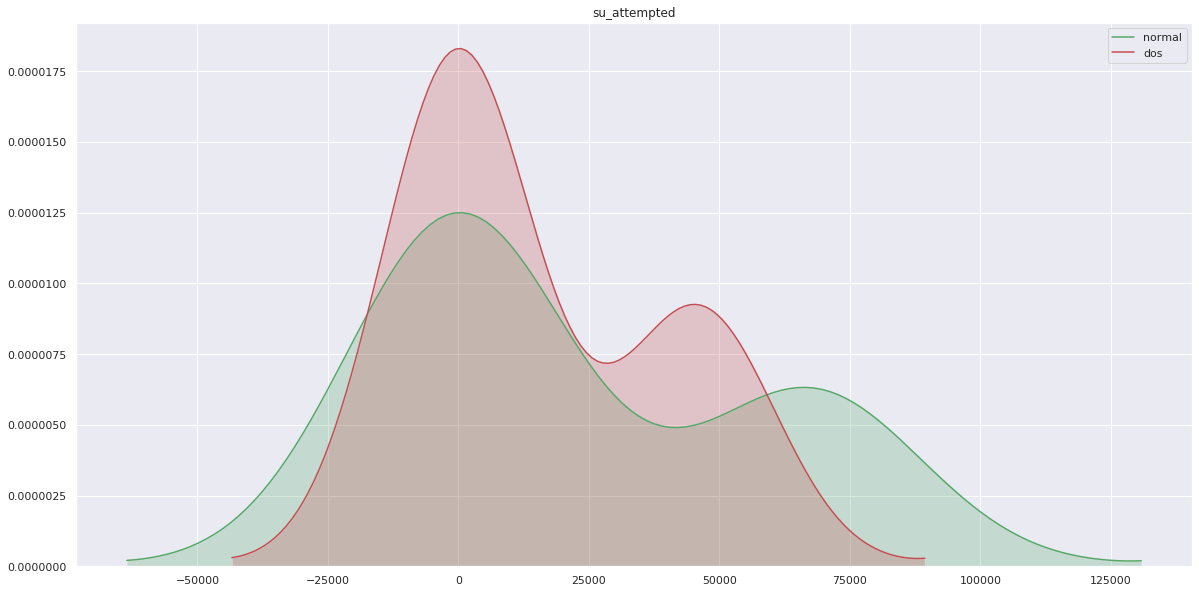

In [526]:
data_su_attempted = pd.concat([su_attempted, attack], axis=1)

normal_su_attempted = data_su_attempted[data_su_attempted.type_attack == 'normal']
dos_su_attempted= data_su_attempted[data_su_attempted.type_attack == 'dos']


sort_normal_su_attempted = normal_su_attempted.sort_values('su_attempted', ascending=True)
sort_dos_su_attempted = dos_su_attempted.sort_values('su_attempted', ascending=True)


count_normal_su_attempted = sort_normal_su_attempted['su_attempted'].value_counts()
count_dos_su_attempted = sort_dos_su_attempted['su_attempted'].value_counts()


data_su_attempted2 = pd.concat([count_normal_su_attempted, count_dos_su_attempted], axis = 1)
data_su_attempted2.columns =['normal','dos']


data_su_attempted2 = data_su_attempted2.fillna(0)
index = data_su_attempted2.index.to_frame()
data_su_attempted3 = pd.concat([data_su_attempted2, index], axis=1)


data_su_attempted3 = data_su_attempted3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_su_attempted3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_su_attempted3['dos'], shade=True, color="r")
plt.title('su_attempted')

# num_root	

In [0]:
# num_root	

In [0]:
num_root = data['num_root']
attack = data['type_attack']

Text(0.5, 1.0, 'num_root')

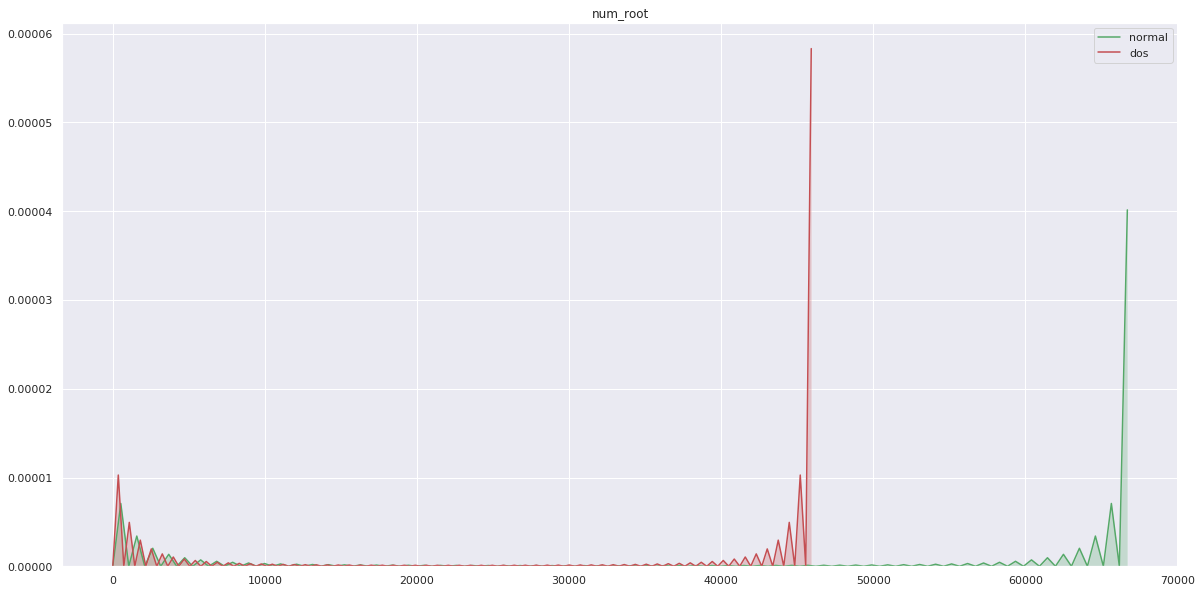

In [529]:
data_num_root = pd.concat([num_root, attack], axis=1)

normal_num_root = data_num_root[data_num_root.type_attack == 'normal']
dos_num_root= data_num_root[data_num_root.type_attack == 'dos']


sort_normal_num_root = normal_num_root.sort_values('num_root', ascending=True)
sort_dos_num_root = dos_num_root.sort_values('num_root', ascending=True)


count_normal_num_root = sort_normal_num_root['num_root'].value_counts()
count_dos_num_root = sort_dos_num_root['num_root'].value_counts()


data_num_root2 = pd.concat([count_normal_num_root, count_dos_num_root], axis = 1)
data_num_root2.columns =['normal','dos']


data_num_root2 = data_num_root2.fillna(0)
index = data_num_root2.index.to_frame()
data_num_root3 = pd.concat([data_num_root2, index], axis=1)


data_num_root3 = data_num_root3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_num_root3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_num_root3['dos'], shade=True, color="r")
plt.title('num_root')

# num_file_creations	


In [0]:
# num_file_creations

Text(0.5, 1.0, 'num_file_creations')

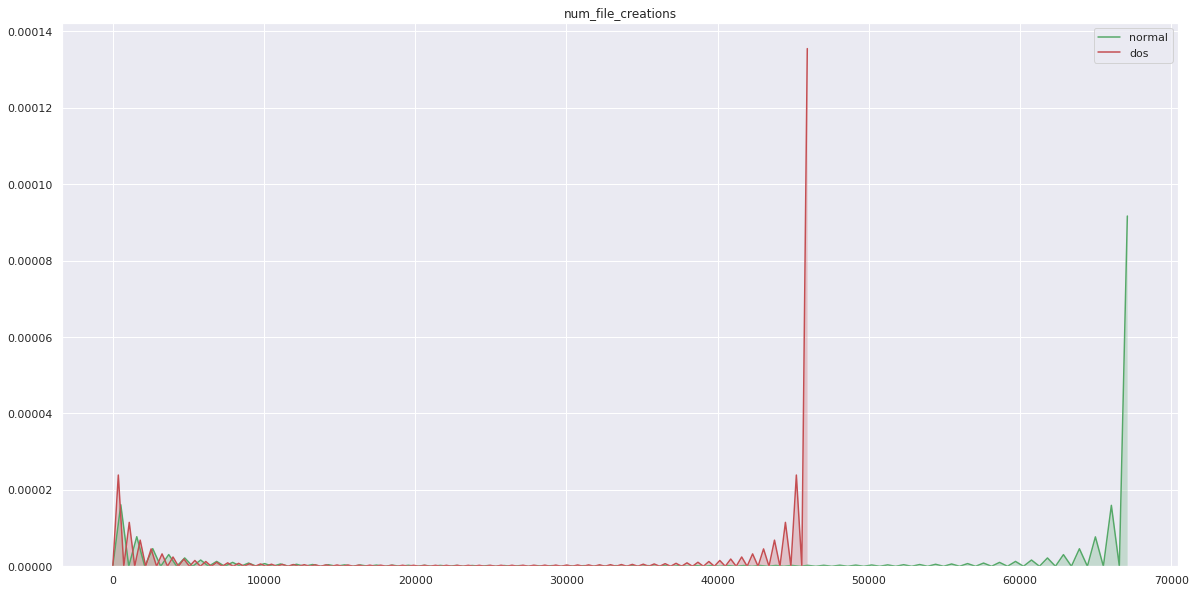

In [531]:
num_file_creations = data['num_file_creations']
attack = data['type_attack']


data_num_file_creations = pd.concat([num_file_creations, attack], axis=1)

normal_num_file_creations = data_num_file_creations[data_num_file_creations.type_attack == 'normal']
dos_num_file_creations= data_num_file_creations[data_num_file_creations.type_attack == 'dos']


sort_normal_num_file_creations = normal_num_file_creations.sort_values('num_file_creations', ascending=True)
sort_dos_num_file_creations = dos_num_file_creations.sort_values('num_file_creations', ascending=True)


count_normal_num_file_creations = sort_normal_num_file_creations['num_file_creations'].value_counts()
count_dos_num_file_creations = sort_dos_num_file_creations['num_file_creations'].value_counts()


data_num_file_creations2 = pd.concat([count_normal_num_file_creations, count_dos_num_file_creations], axis = 1)
data_num_file_creations2.columns =['normal','dos']


data_num_file_creations2 = data_num_file_creations2.fillna(0)
index = data_num_file_creations2.index.to_frame()
data_num_file_creations3 = pd.concat([data_num_file_creations2, index], axis=1)


data_num_file_creations3 = data_num_file_creations3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_num_file_creations3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_num_file_creations3['dos'], shade=True, color="r")
plt.title('num_file_creations')

# num_shells	

In [0]:
# num_shells	

In [0]:
num_shells = data['num_shells']
attack = data['type_attack']

Text(0.5, 1.0, 'num_shells')

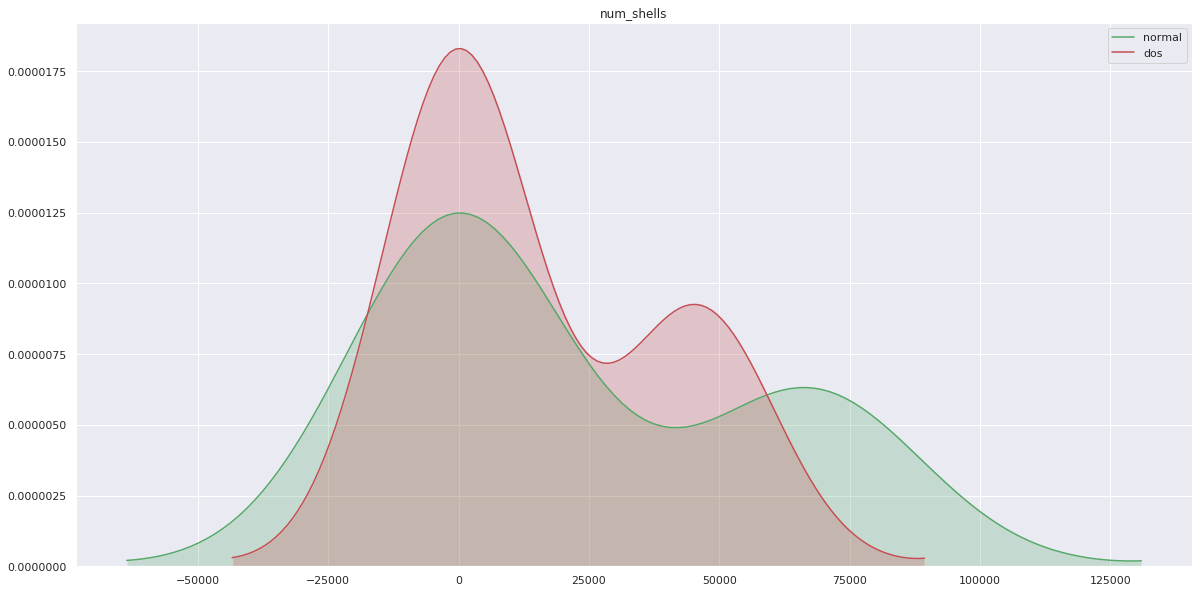

In [534]:
data_num_shells = pd.concat([num_shells, attack], axis=1)

normal_num_shells = data_num_shells[data_num_shells.type_attack == 'normal']
dos_num_shells= data_num_shells[data_num_shells.type_attack == 'dos']


sort_normal_num_shells = normal_num_shells.sort_values('num_shells', ascending=True)
sort_dos_num_shells = dos_num_shells.sort_values('num_shells', ascending=True)


count_normal_num_shells = sort_normal_num_shells['num_shells'].value_counts()
count_dos_num_shells = sort_dos_num_shells['num_shells'].value_counts()


data_num_shells2 = pd.concat([count_normal_num_shells, count_dos_num_shells], axis = 1)
data_num_shells2.columns =['normal','dos']


data_num_shells2 = data_num_shells2.fillna(0)
index = data_num_shells2.index.to_frame()
data_num_shells3 = pd.concat([data_num_shells2, index], axis=1)


data_num_shells3 = data_num_shells3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_num_shells3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_num_shells3['dos'], shade=True, color="r")
plt.title('num_shells')

# num_access_files	

In [0]:
# num_access_files

In [0]:
num_access_files = data['num_access_files']
attack = data['type_attack']

Text(0.5, 1.0, 'num_access_files')

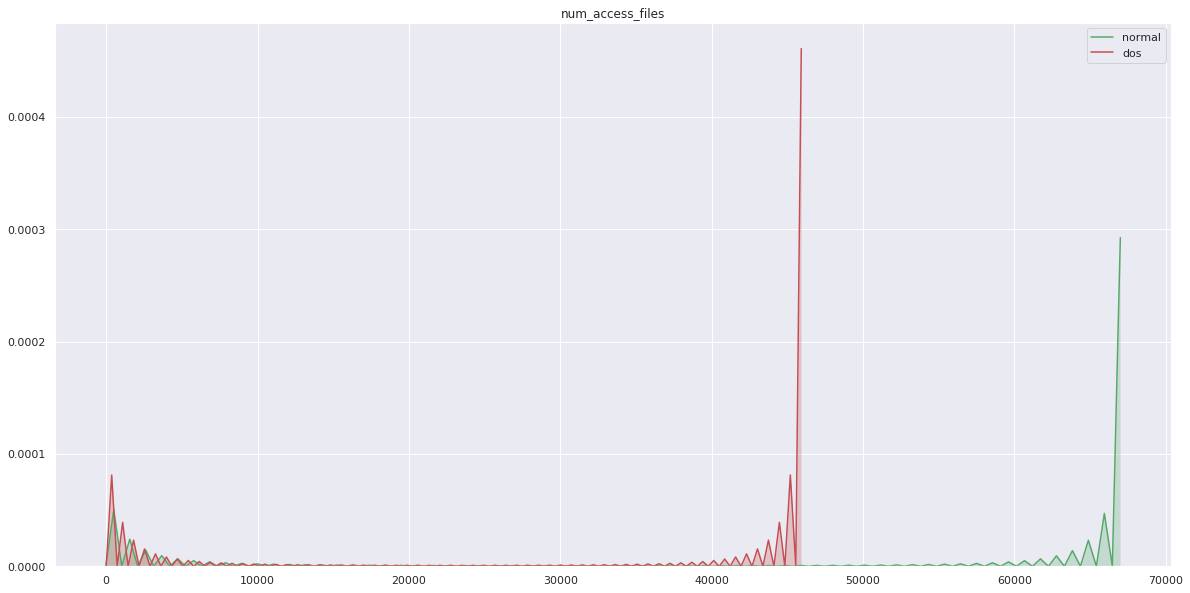

In [537]:
data_num_access_files = pd.concat([num_access_files, attack], axis=1)

normal_num_access_files = data_num_access_files[data_num_access_files.type_attack == 'normal']
dos_num_access_files= data_num_access_files[data_num_access_files.type_attack == 'dos']


sort_normal_num_access_files = normal_num_access_files.sort_values('num_access_files', ascending=True)
sort_dos_num_access_files = dos_num_access_files.sort_values('num_access_files', ascending=True)


count_normal_num_access_files = sort_normal_num_access_files['num_access_files'].value_counts()
count_dos_num_access_files = sort_dos_num_access_files['num_access_files'].value_counts()


data_num_access_files2 = pd.concat([count_normal_num_access_files, count_dos_num_access_files], axis = 1)
data_num_access_files2.columns =['normal','dos']


data_num_access_files2 = data_num_access_files2.fillna(0)
index = data_num_access_files2.index.to_frame()
data_num_access_files3 = pd.concat([data_num_access_files2, index], axis=1)


data_num_access_files3 = data_num_access_files3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_num_access_files3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_num_access_files3['dos'], shade=True, color="r")
plt.title('num_access_files')

# num_outbound_cmds	

In [0]:
# num_outbound_cmds	

In [0]:
num_outbound_cmds = data['num_outbound_cmds']
attack = data['type_attack']

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'num_outbound_cmds')

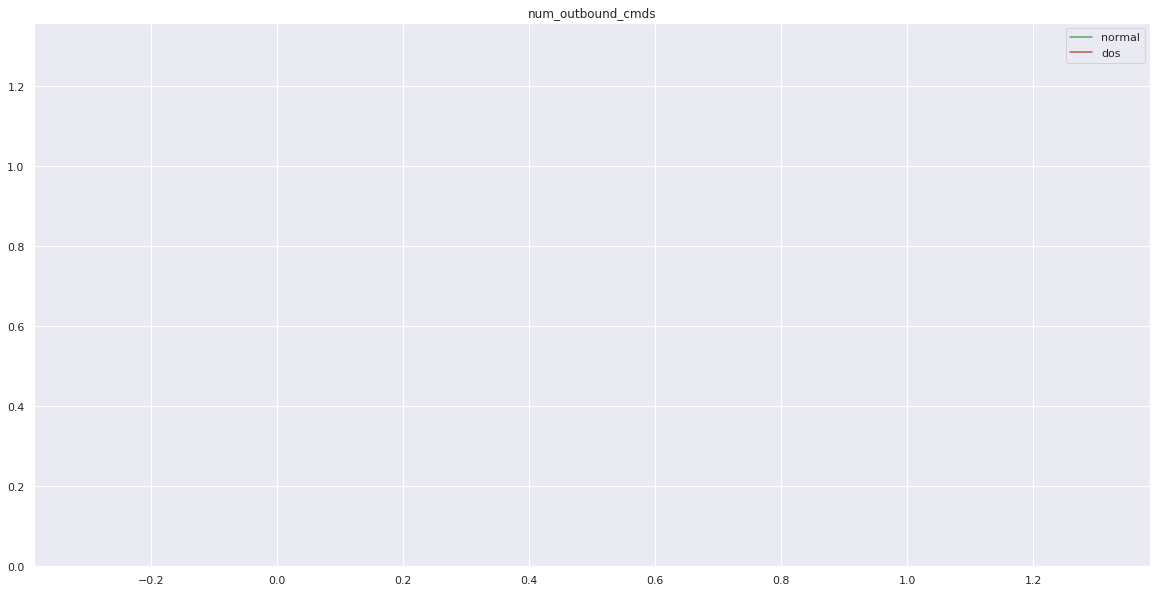

In [540]:
data_num_outbound_cmds = pd.concat([num_outbound_cmds, attack], axis=1)

normal_num_outbound_cmds = data_num_outbound_cmds[data_num_outbound_cmds.type_attack == 'normal']
dos_num_outbound_cmds= data_num_outbound_cmds[data_num_outbound_cmds.type_attack == 'dos']


sort_normal_num_outbound_cmds = normal_num_outbound_cmds.sort_values('num_outbound_cmds', ascending=True)
sort_dos_num_outbound_cmds = dos_num_outbound_cmds.sort_values('num_outbound_cmds', ascending=True)


count_normal_num_outbound_cmds = sort_normal_num_outbound_cmds['num_outbound_cmds'].value_counts()
count_dos_num_outbound_cmds = sort_dos_num_outbound_cmds['num_outbound_cmds'].value_counts()


data_num_outbound_cmds2 = pd.concat([count_normal_num_outbound_cmds, count_dos_num_outbound_cmds], axis = 1)
data_num_outbound_cmds2.columns =['normal','dos']


data_num_outbound_cmds2 = data_num_outbound_cmds2.fillna(0)
index = data_num_outbound_cmds2.index.to_frame()
data_num_outbound_cmds3 = pd.concat([data_num_outbound_cmds2, index], axis=1)


data_num_outbound_cmds3 = data_num_outbound_cmds3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_num_outbound_cmds3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_num_outbound_cmds3['dos'], shade=True, color="r")
plt.title('num_outbound_cmds')

# is_host_login	

In [0]:
# is_host_login	

Text(0.5, 1.0, 'is_host_login')

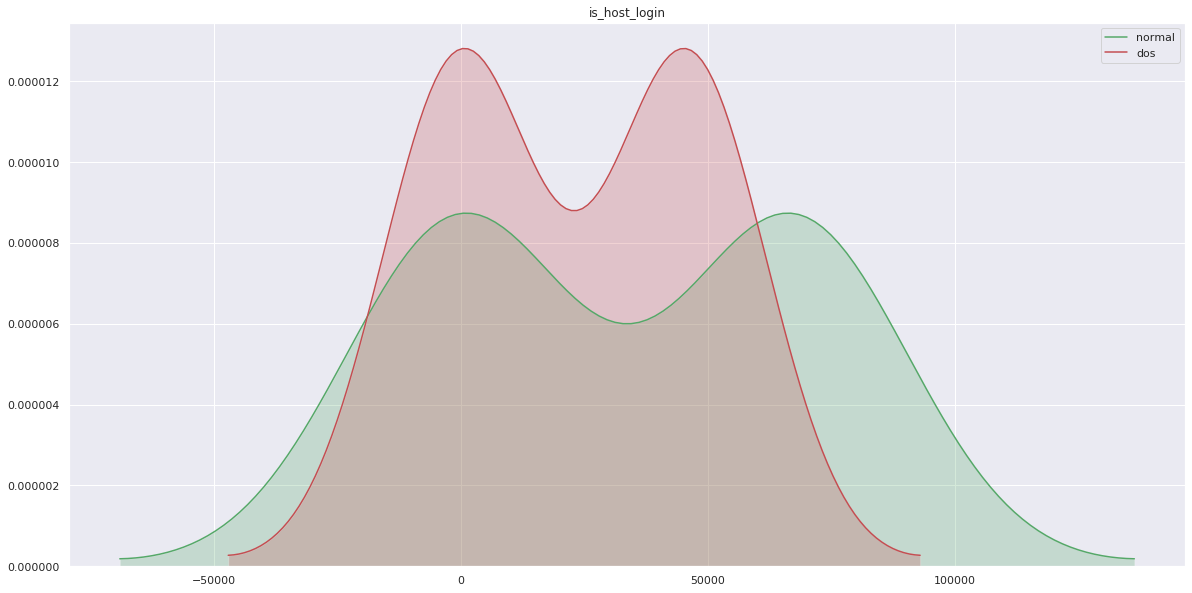

In [542]:
is_host_login = data['is_host_login']
attack = data['type_attack']


data_is_host_login = pd.concat([is_host_login, attack], axis=1)

normal_is_host_login = data_is_host_login[data_is_host_login.type_attack == 'normal']
dos_is_host_login= data_is_host_login[data_is_host_login.type_attack == 'dos']


sort_normal_is_host_login = normal_is_host_login.sort_values('is_host_login', ascending=True)
sort_dos_is_host_login = dos_is_host_login.sort_values('is_host_login', ascending=True)


count_normal_is_host_login = sort_normal_is_host_login['is_host_login'].value_counts()
count_dos_is_host_login = sort_dos_is_host_login['is_host_login'].value_counts()


data_is_host_login2 = pd.concat([count_normal_is_host_login, count_dos_is_host_login], axis = 1)
data_is_host_login2.columns =['normal','dos']


data_is_host_login2 = data_is_host_login2.fillna(0)
index = data_is_host_login2.index.to_frame()
data_is_host_login3 = pd.concat([data_is_host_login2, index], axis=1)


data_is_host_login3 = data_is_host_login3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_is_host_login3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_is_host_login3['dos'], shade=True, color="r")
plt.title('is_host_login')

# is_guest_login	

In [0]:
# is_guest_login	

Text(0.5, 1.0, 'is_guest_login')

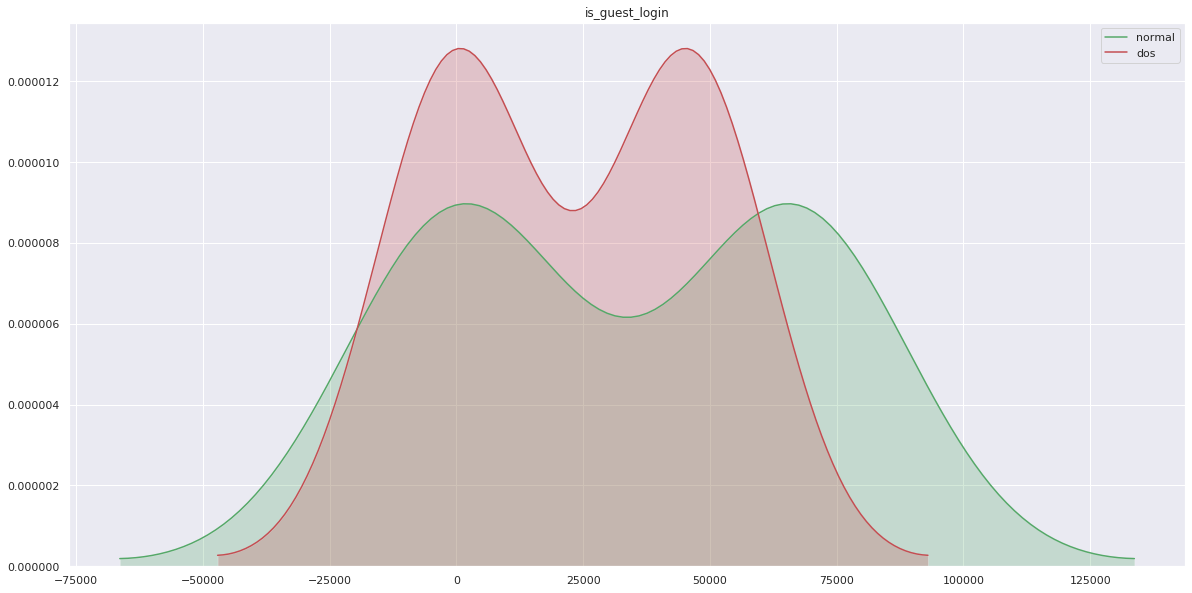

In [544]:
is_guest_login = data['is_guest_login']
attack = data['type_attack']


data_is_guest_login = pd.concat([is_guest_login, attack], axis=1)

normal_is_guest_login = data_is_guest_login[data_is_guest_login.type_attack == 'normal']
dos_is_guest_login= data_is_guest_login[data_is_guest_login.type_attack == 'dos']


sort_normal_is_guest_login = normal_is_guest_login.sort_values('is_guest_login', ascending=True)
sort_dos_is_guest_login = dos_is_guest_login.sort_values('is_guest_login', ascending=True)


count_normal_is_guest_login = sort_normal_is_guest_login['is_guest_login'].value_counts()
count_dos_is_guest_login = sort_dos_is_guest_login['is_guest_login'].value_counts()


data_is_guest_login2 = pd.concat([count_normal_is_guest_login, count_dos_is_guest_login], axis = 1)
data_is_guest_login2.columns =['normal','dos']


data_is_guest_login2 = data_is_guest_login2.fillna(0)
index = data_is_guest_login2.index.to_frame()
data_is_guest_login3 = pd.concat([data_is_guest_login2, index], axis=1)


data_is_guest_login3 = data_is_guest_login3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_is_guest_login3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_is_guest_login3['dos'], shade=True, color="r")
plt.title('is_guest_login')

# count

In [0]:
# count

Text(0.5, 1.0, 'count')

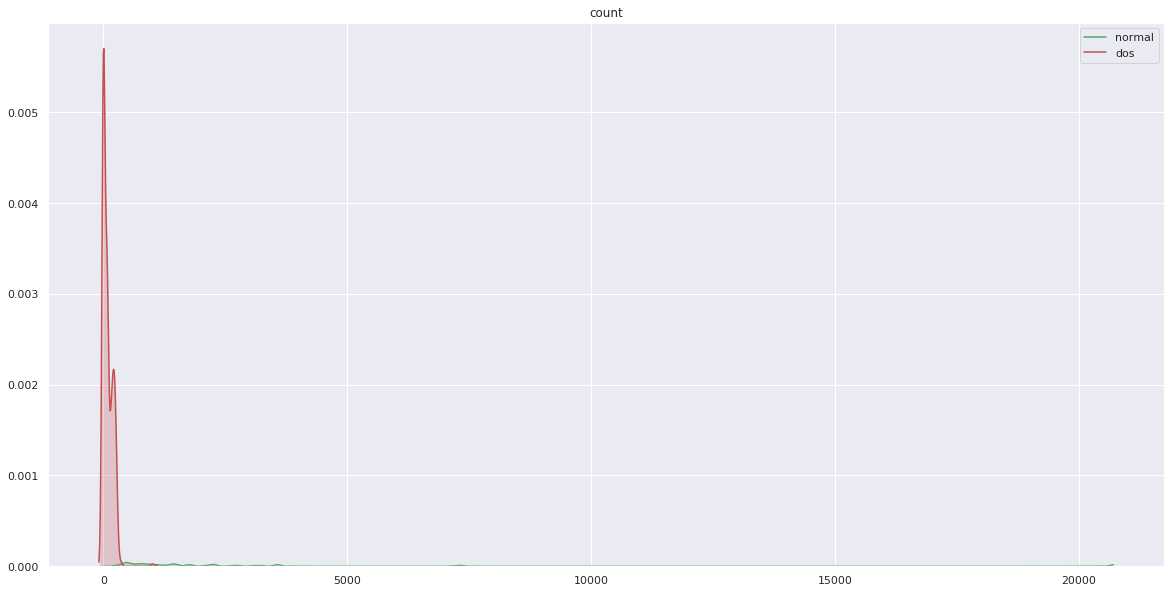

In [546]:
count = data['count']
attack = data['type_attack']


data_count = pd.concat([count, attack], axis=1)

normal_count = data_count[data_count.type_attack == 'normal']
dos_count= data_count[data_count.type_attack == 'dos']


sort_normal_count = normal_count.sort_values('count', ascending=True)
sort_dos_count = dos_count.sort_values('count', ascending=True)


count_normal_count = sort_normal_count['count'].value_counts()
count_dos_count = sort_dos_count['count'].value_counts()


data_count2 = pd.concat([count_normal_count, count_dos_count], axis = 1)
data_count2.columns =['normal','dos']


data_count2 = data_count2.fillna(0)
index = data_count2.index.to_frame()
data_count3 = pd.concat([data_count2, index], axis=1)


data_count3 = data_count3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_count3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_count3['dos'], shade=True, color="r")
plt.title('count')

# srv_count	

In [0]:
# srv_count	

Text(0.5, 1.0, 'srv_count')

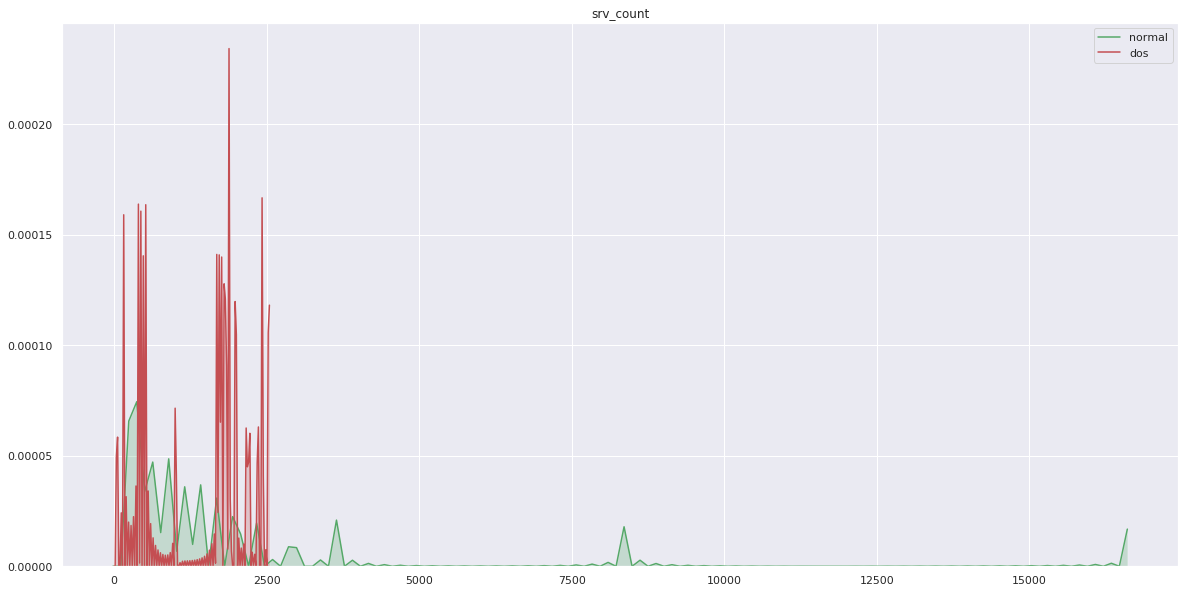

In [548]:
srv_count = data['srv_count']
attack = data['type_attack']


data_srv_count = pd.concat([srv_count, attack], axis=1)

normal_srv_count = data_srv_count[data_srv_count.type_attack == 'normal']
dos_srv_count= data_srv_count[data_srv_count.type_attack == 'dos']


sort_normal_srv_count = normal_srv_count.sort_values('srv_count', ascending=True)
sort_dos_srv_count = dos_srv_count.sort_values('srv_count', ascending=True)


count_normal_srv_count = sort_normal_srv_count['srv_count'].value_counts()
count_dos_srv_count = sort_dos_srv_count['srv_count'].value_counts()


data_srv_count2 = pd.concat([count_normal_srv_count, count_dos_srv_count], axis = 1)
data_srv_count2.columns =['normal','dos']


data_srv_count2 = data_srv_count2.fillna(0)
index = data_srv_count2.index.to_frame()
data_srv_count3 = pd.concat([data_srv_count2, index], axis=1)


data_srv_count3 = data_srv_count3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_srv_count3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_srv_count3['dos'], shade=True, color="r")
plt.title('srv_count')

# srv_serror_rate	

In [0]:
# srv_serror_rate	

Text(0.5, 1.0, 'srv_serror_rate')

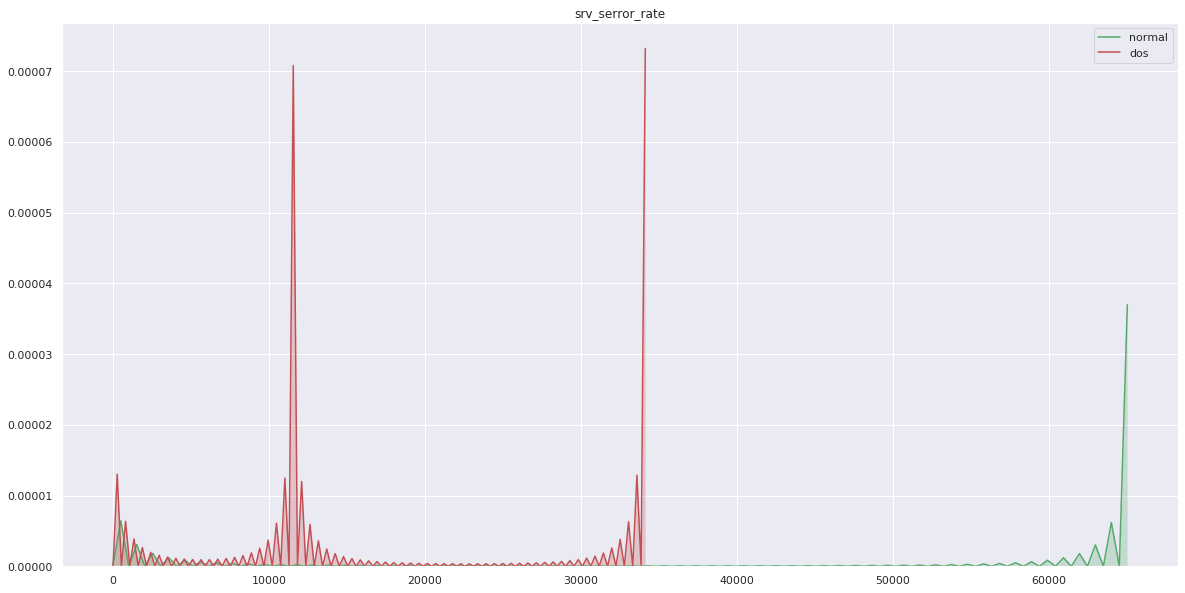

In [550]:
srv_serror_rate = data['srv_serror_rate']
attack = data['type_attack']


data_srv_serror_rate = pd.concat([srv_serror_rate, attack], axis=1)

normal_srv_serror_rate = data_srv_serror_rate[data_srv_serror_rate.type_attack == 'normal']
dos_srv_serror_rate= data_srv_serror_rate[data_srv_serror_rate.type_attack == 'dos']


sort_normal_srv_serror_rate = normal_srv_serror_rate.sort_values('srv_serror_rate', ascending=True)
sort_dos_srv_serror_rate = dos_srv_serror_rate.sort_values('srv_serror_rate', ascending=True)


count_normal_srv_serror_rate = sort_normal_srv_serror_rate['srv_serror_rate'].value_counts()
count_dos_srv_serror_rate = sort_dos_srv_serror_rate['srv_serror_rate'].value_counts()


data_srv_serror_rate2 = pd.concat([count_normal_srv_serror_rate, count_dos_srv_serror_rate], axis = 1)
data_srv_serror_rate2.columns =['normal','dos']


data_srv_serror_rate2 = data_srv_serror_rate2.fillna(0)
index = data_srv_serror_rate2.index.to_frame()
data_srv_serror_rate3 = pd.concat([data_srv_serror_rate2, index], axis=1)


data_srv_serror_rate3 = data_srv_serror_rate3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_srv_serror_rate3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_srv_serror_rate3['dos'], shade=True, color="r")
plt.title('srv_serror_rate')

# serror_rate	

In [0]:
# serror_rate	

# ambil normal & dos aja


Text(0.5, 1.0, 'serror_rate')

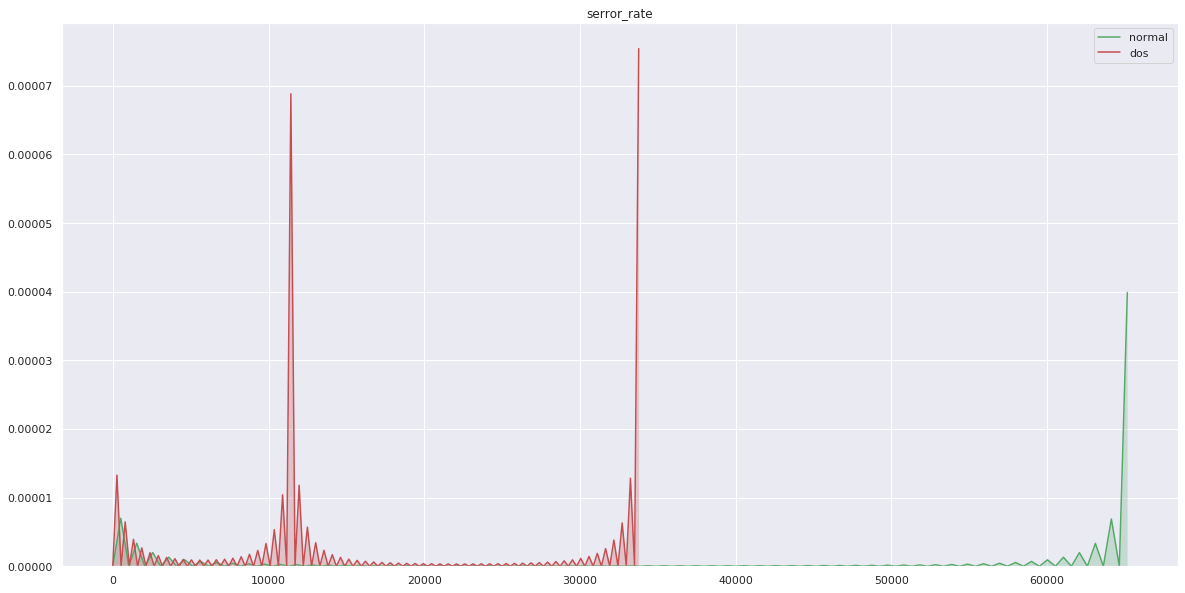

In [551]:
serror_rate = data['serror_rate']
attack = data['type_attack']


data_serror_rate = pd.concat([serror_rate, attack], axis=1)

normal_serror_rate = data_serror_rate[data_serror_rate.type_attack == 'normal']
dos_serror_rate= data_serror_rate[data_serror_rate.type_attack == 'dos']


sort_normal_serror_rate = normal_serror_rate.sort_values('serror_rate', ascending=True)
sort_dos_serror_rate = dos_serror_rate.sort_values('serror_rate', ascending=True)


count_normal_serror_rate = sort_normal_serror_rate['serror_rate'].value_counts()
count_dos_serror_rate = sort_dos_serror_rate['serror_rate'].value_counts()


data_serror_rate2 = pd.concat([count_normal_serror_rate, count_dos_serror_rate], axis = 1)
data_serror_rate2.columns =['normal','dos']


data_serror_rate2 = data_serror_rate2.fillna(0)
index = data_serror_rate2.index.to_frame()
data_serror_rate3 = pd.concat([data_serror_rate2, index], axis=1)


data_serror_rate3 = data_serror_rate3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_serror_rate3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_serror_rate3['dos'], shade=True, color="r")
plt.title('serror_rate')

# rerror_rate	

In [0]:
# rerror_rate	

Text(0.5, 1.0, 'rerror_rate')

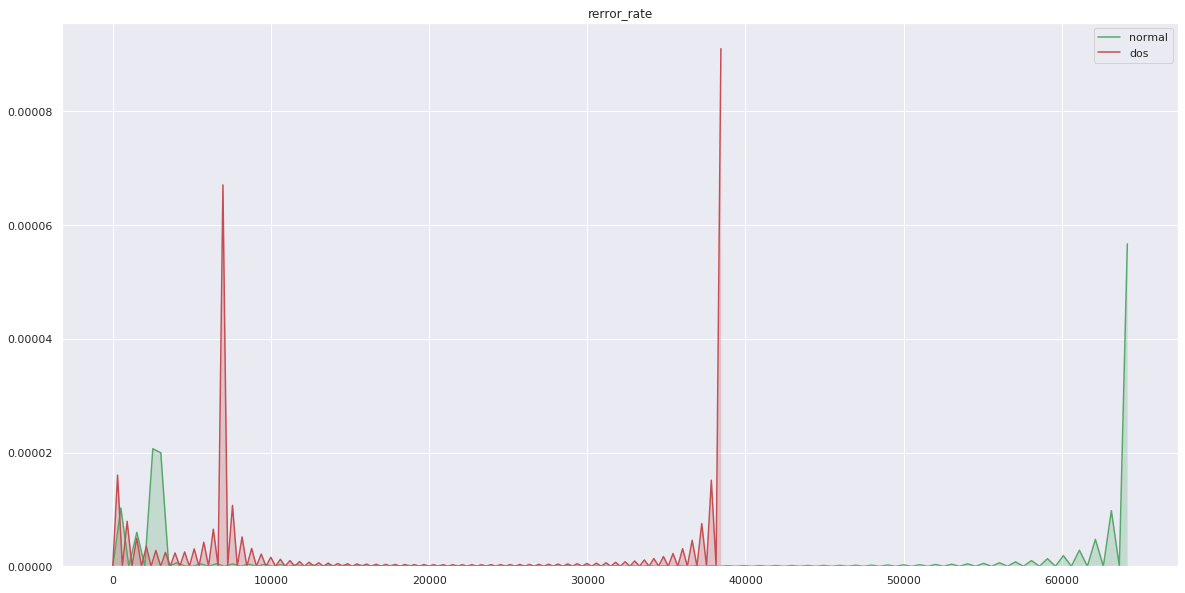

In [553]:
rerror_rate = data['rerror_rate']
attack = data['type_attack']


data_rerror_rate = pd.concat([rerror_rate, attack], axis=1)

normal_rerror_rate = data_rerror_rate[data_rerror_rate.type_attack == 'normal']
dos_rerror_rate= data_rerror_rate[data_rerror_rate.type_attack == 'dos']


sort_normal_rerror_rate = normal_rerror_rate.sort_values('rerror_rate', ascending=True)
sort_dos_rerror_rate = dos_rerror_rate.sort_values('rerror_rate', ascending=True)


count_normal_rerror_rate = sort_normal_rerror_rate['rerror_rate'].value_counts()
count_dos_rerror_rate = sort_dos_rerror_rate['rerror_rate'].value_counts()


data_rerror_rate2 = pd.concat([count_normal_rerror_rate, count_dos_rerror_rate], axis = 1)
data_rerror_rate2.columns =['normal','dos']


data_rerror_rate2 = data_rerror_rate2.fillna(0)
index = data_rerror_rate2.index.to_frame()
data_rerror_rate3 = pd.concat([data_rerror_rate2, index], axis=1)


data_rerror_rate3 = data_rerror_rate3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_rerror_rate3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_rerror_rate3['dos'], shade=True, color="r")
plt.title('rerror_rate')

# srv_rerror_rate	

In [0]:
# srv_rerror_rate	

Text(0.5, 1.0, 'srv_rerror_rate')

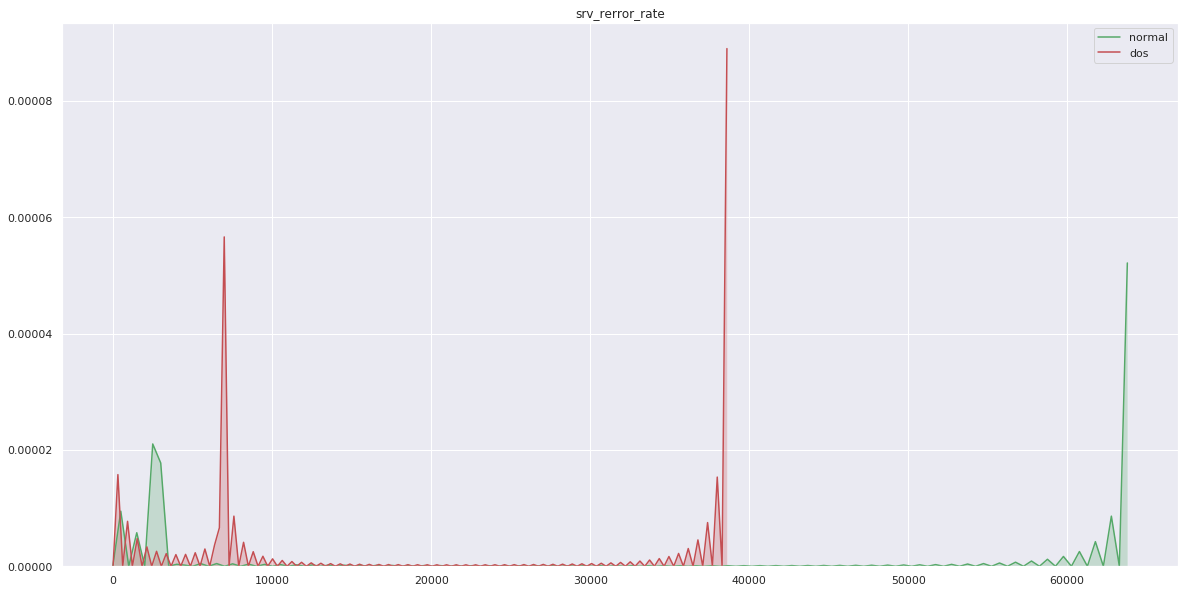

In [555]:
srv_rerror_rate = data['srv_rerror_rate']
attack = data['type_attack']


data_srv_rerror_rate = pd.concat([srv_rerror_rate, attack], axis=1)

normal_srv_rerror_rate = data_srv_rerror_rate[data_srv_rerror_rate.type_attack == 'normal']
dos_srv_rerror_rate= data_srv_rerror_rate[data_srv_rerror_rate.type_attack == 'dos']


sort_normal_srv_rerror_rate = normal_srv_rerror_rate.sort_values('srv_rerror_rate', ascending=True)
sort_dos_srv_rerror_rate = dos_srv_rerror_rate.sort_values('srv_rerror_rate', ascending=True)


count_normal_srv_rerror_rate = sort_normal_srv_rerror_rate['srv_rerror_rate'].value_counts()
count_dos_srv_rerror_rate = sort_dos_srv_rerror_rate['srv_rerror_rate'].value_counts()


data_srv_rerror_rate2 = pd.concat([count_normal_srv_rerror_rate, count_dos_srv_rerror_rate], axis = 1)
data_srv_rerror_rate2.columns =['normal','dos']


data_srv_rerror_rate2 = data_srv_rerror_rate2.fillna(0)
index = data_srv_rerror_rate2.index.to_frame()
data_srv_rerror_rate3 = pd.concat([data_srv_rerror_rate2, index], axis=1)


data_srv_rerror_rate3 = data_srv_rerror_rate3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_srv_rerror_rate3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_srv_rerror_rate3['dos'], shade=True, color="r")
plt.title('srv_rerror_rate')

# same_srv_rate	

In [0]:
# same_srv_rate	

Text(0.5, 1.0, 'same_srv_rate')

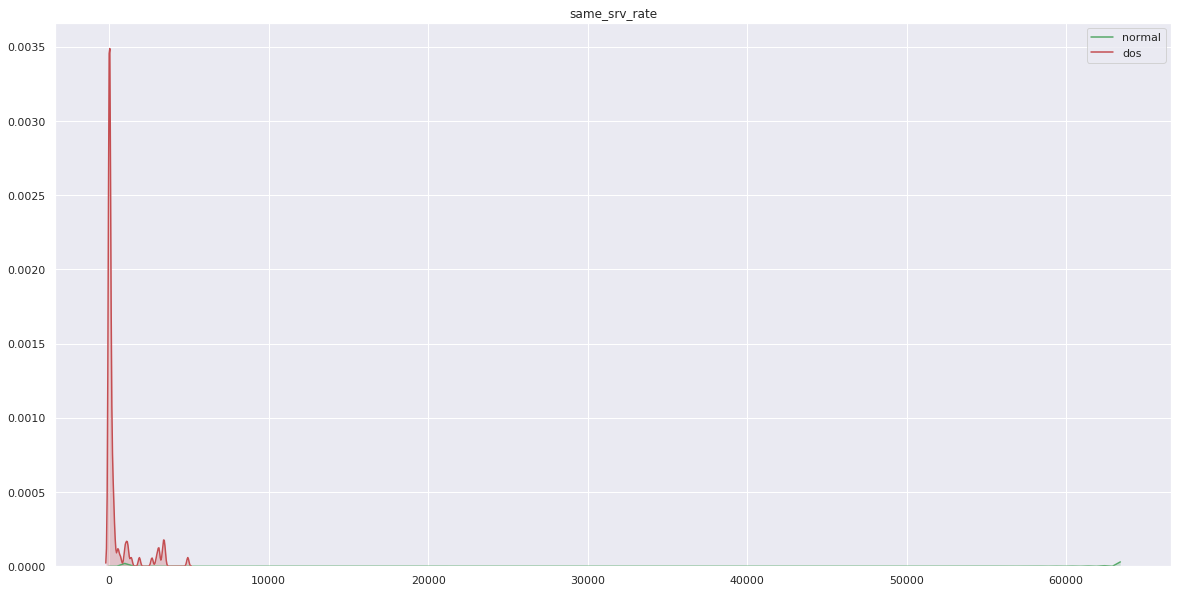

In [557]:
same_srv_rate = data['same_srv_rate']
attack = data['type_attack']


data_same_srv_rate = pd.concat([same_srv_rate, attack], axis=1)

normal_same_srv_rate = data_same_srv_rate[data_same_srv_rate.type_attack == 'normal']
dos_same_srv_rate= data_same_srv_rate[data_same_srv_rate.type_attack == 'dos']


sort_normal_same_srv_rate = normal_same_srv_rate.sort_values('same_srv_rate', ascending=True)
sort_dos_same_srv_rate = dos_same_srv_rate.sort_values('same_srv_rate', ascending=True)


count_normal_same_srv_rate = sort_normal_same_srv_rate['same_srv_rate'].value_counts()
count_dos_same_srv_rate = sort_dos_same_srv_rate['same_srv_rate'].value_counts()


data_same_srv_rate2 = pd.concat([count_normal_same_srv_rate, count_dos_same_srv_rate], axis = 1)
data_same_srv_rate2.columns =['normal','dos']


data_same_srv_rate2 = data_same_srv_rate2.fillna(0)
index = data_same_srv_rate2.index.to_frame()
data_same_srv_rate3 = pd.concat([data_same_srv_rate2, index], axis=1)


data_same_srv_rate3 = data_same_srv_rate3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_same_srv_rate3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_same_srv_rate3['dos'], shade=True, color="r")
plt.title('same_srv_rate')

# diff_srv_rate	

In [0]:
# diff_srv_rate	

Text(0.5, 1.0, 'diff_srv_rate')

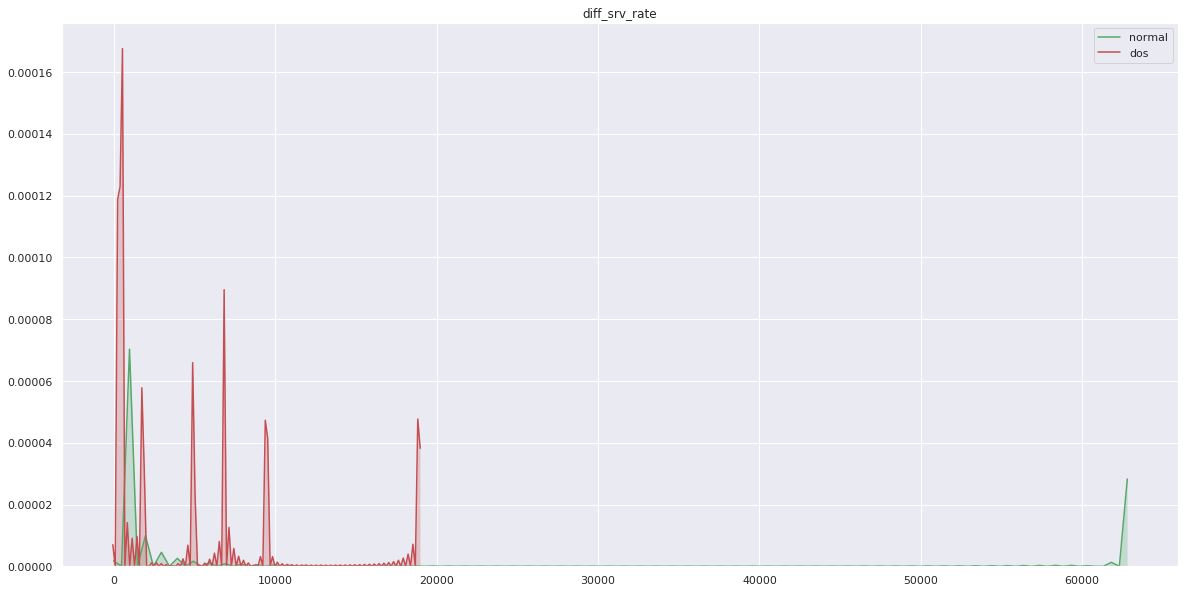

In [559]:
diff_srv_rate = data['diff_srv_rate']
attack = data['type_attack']


data_diff_srv_rate = pd.concat([diff_srv_rate, attack], axis=1)

normal_diff_srv_rate = data_diff_srv_rate[data_diff_srv_rate.type_attack == 'normal']
dos_diff_srv_rate= data_diff_srv_rate[data_diff_srv_rate.type_attack == 'dos']


sort_normal_diff_srv_rate = normal_diff_srv_rate.sort_values('diff_srv_rate', ascending=True)
sort_dos_diff_srv_rate = dos_diff_srv_rate.sort_values('diff_srv_rate', ascending=True)


count_normal_diff_srv_rate = sort_normal_diff_srv_rate['diff_srv_rate'].value_counts()
count_dos_diff_srv_rate = sort_dos_diff_srv_rate['diff_srv_rate'].value_counts()


data_diff_srv_rate2 = pd.concat([count_normal_diff_srv_rate, count_dos_diff_srv_rate], axis = 1)
data_diff_srv_rate2.columns =['normal','dos']


data_diff_srv_rate2 = data_diff_srv_rate2.fillna(0)
index = data_diff_srv_rate2.index.to_frame()
data_diff_srv_rate3 = pd.concat([data_diff_srv_rate2, index], axis=1)


data_diff_srv_rate3 = data_diff_srv_rate3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_diff_srv_rate3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_diff_srv_rate3['dos'], shade=True, color="r")
plt.title('diff_srv_rate')

# srv_diff_host_rate	

In [0]:
# srv_diff_host_rate	

Text(0.5, 1.0, 'srv_diff_host_rate')

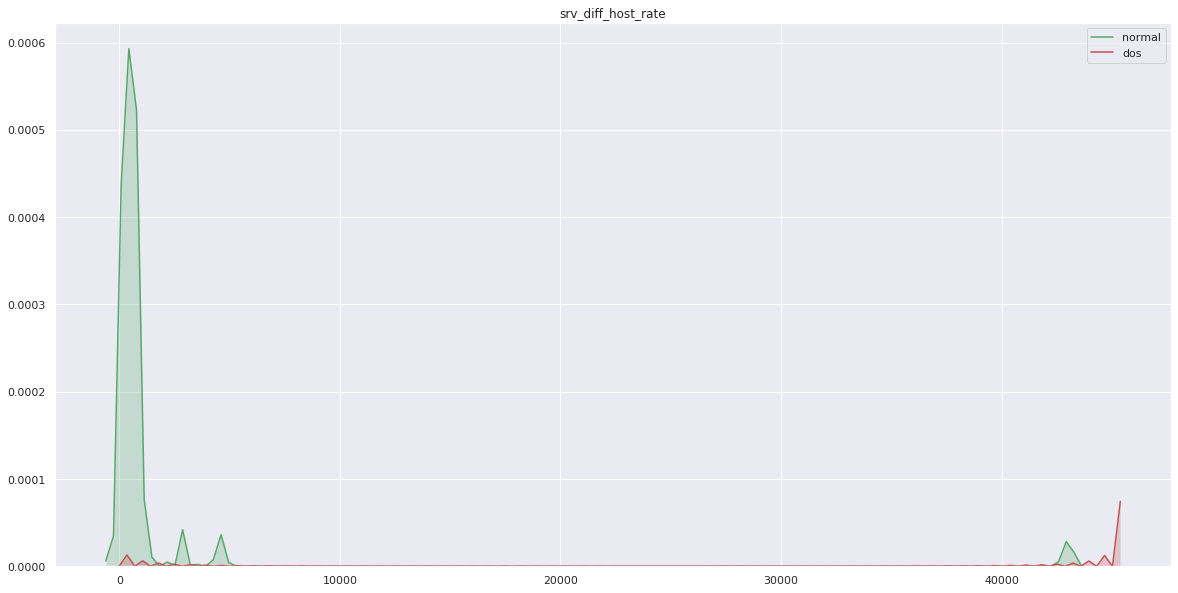

In [561]:
srv_diff_host_rate = data['srv_diff_host_rate']
attack = data['type_attack']


data_srv_diff_host_rate = pd.concat([srv_diff_host_rate, attack], axis=1)

normal_srv_diff_host_rate = data_srv_diff_host_rate[data_srv_diff_host_rate.type_attack == 'normal']
dos_srv_diff_host_rate= data_srv_diff_host_rate[data_srv_diff_host_rate.type_attack == 'dos']


sort_normal_srv_diff_host_rate = normal_srv_diff_host_rate.sort_values('srv_diff_host_rate', ascending=True)
sort_dos_srv_diff_host_rate = dos_srv_diff_host_rate.sort_values('srv_diff_host_rate', ascending=True)


count_normal_srv_diff_host_rate = sort_normal_srv_diff_host_rate['srv_diff_host_rate'].value_counts()
count_dos_srv_diff_host_rate = sort_dos_srv_diff_host_rate['srv_diff_host_rate'].value_counts()


data_srv_diff_host_rate2 = pd.concat([count_normal_srv_diff_host_rate, count_dos_srv_diff_host_rate], axis = 1)
data_srv_diff_host_rate2.columns =['normal','dos']


data_srv_diff_host_rate2 = data_srv_diff_host_rate2.fillna(0)
index = data_srv_diff_host_rate2.index.to_frame()
data_srv_diff_host_rate3 = pd.concat([data_srv_diff_host_rate2, index], axis=1)


data_srv_diff_host_rate3 = data_srv_diff_host_rate3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_srv_diff_host_rate3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_srv_diff_host_rate3['dos'], shade=True, color="r")
plt.title('srv_diff_host_rate')

# dst_host_count

In [0]:
# dst_host_count

Text(0.5, 1.0, 'dst_host_count')

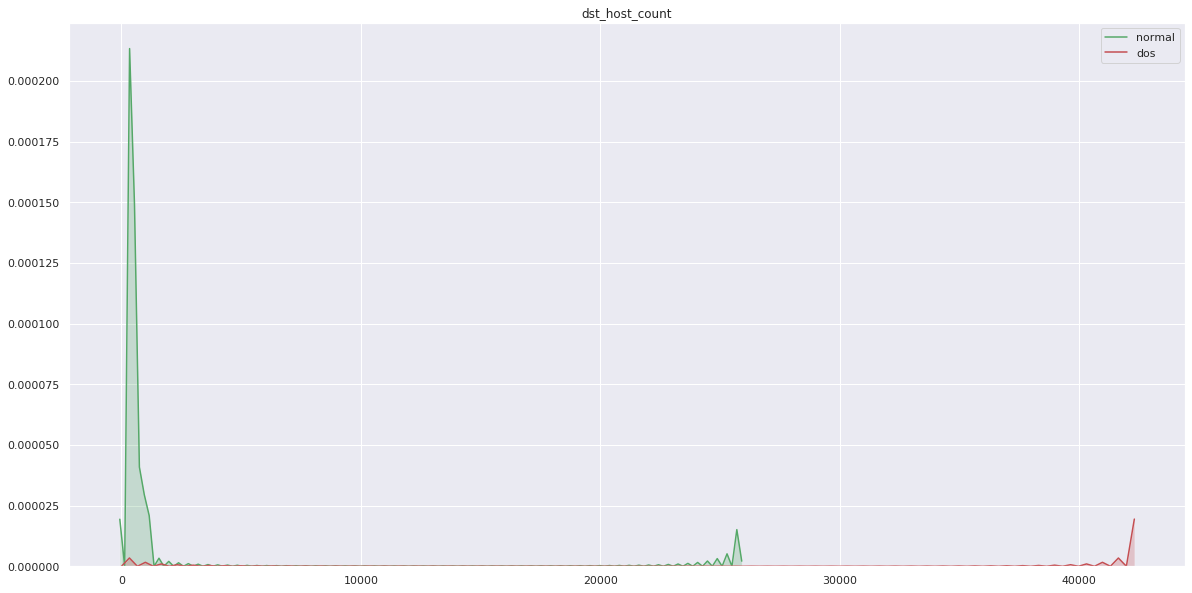

In [563]:
dst_host_count = data['dst_host_count']
attack = data['type_attack']


data_dst_host_count = pd.concat([dst_host_count, attack], axis=1)

normal_dst_host_count = data_dst_host_count[data_dst_host_count.type_attack == 'normal']
dos_dst_host_count= data_dst_host_count[data_dst_host_count.type_attack == 'dos']


sort_normal_dst_host_count = normal_dst_host_count.sort_values('dst_host_count', ascending=True)
sort_dos_dst_host_count = dos_dst_host_count.sort_values('dst_host_count', ascending=True)


count_normal_dst_host_count = sort_normal_dst_host_count['dst_host_count'].value_counts()
count_dos_dst_host_count = sort_dos_dst_host_count['dst_host_count'].value_counts()


data_dst_host_count2 = pd.concat([count_normal_dst_host_count, count_dos_dst_host_count], axis = 1)
data_dst_host_count2.columns =['normal','dos']


data_dst_host_count2 = data_dst_host_count2.fillna(0)
index = data_dst_host_count2.index.to_frame()
data_dst_host_count3 = pd.concat([data_dst_host_count2, index], axis=1)


data_dst_host_count3 = data_dst_host_count3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_dst_host_count3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_dst_host_count3['dos'], shade=True, color="r")
plt.title('dst_host_count')

# dst_host_srv_count	

In [0]:
# dst_host_srv_count	

Text(0.5, 1.0, 'dst_host_srv_count')

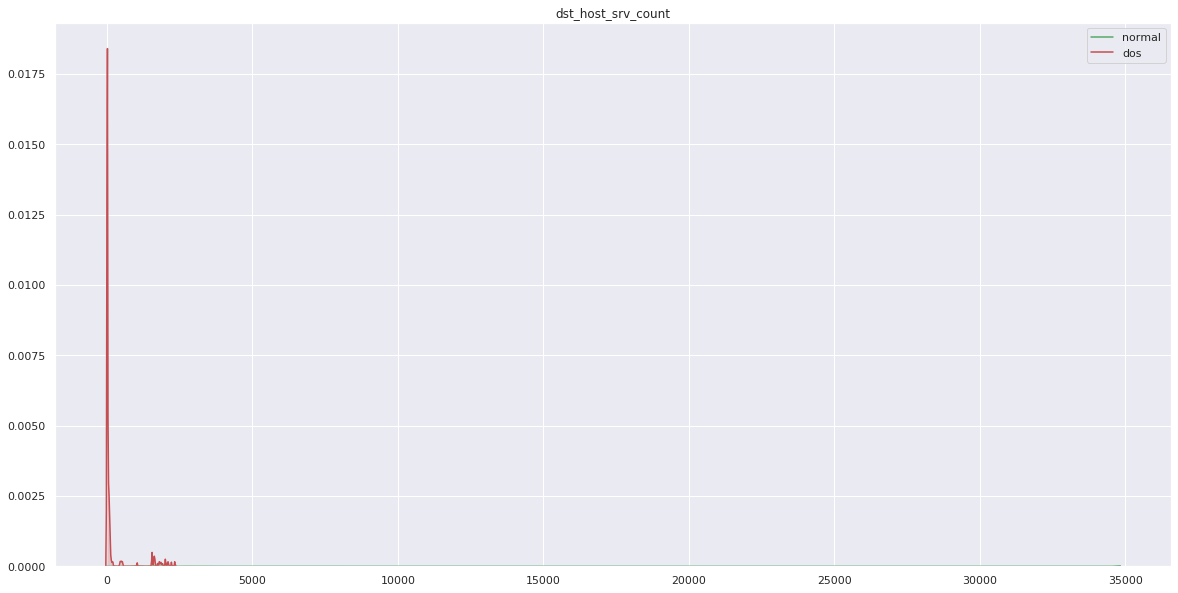

In [565]:
dst_host_srv_count = data['dst_host_srv_count']
attack = data['type_attack']


data_dst_host_srv_count = pd.concat([dst_host_srv_count, attack], axis=1)

normal_dst_host_srv_count = data_dst_host_srv_count[data_dst_host_srv_count.type_attack == 'normal']
dos_dst_host_srv_count= data_dst_host_srv_count[data_dst_host_srv_count.type_attack == 'dos']


sort_normal_dst_host_srv_count = normal_dst_host_srv_count.sort_values('dst_host_srv_count', ascending=True)
sort_dos_dst_host_srv_count = dos_dst_host_srv_count.sort_values('dst_host_srv_count', ascending=True)


count_normal_dst_host_srv_count = sort_normal_dst_host_srv_count['dst_host_srv_count'].value_counts()
count_dos_dst_host_srv_count = sort_dos_dst_host_srv_count['dst_host_srv_count'].value_counts()


data_dst_host_srv_count2 = pd.concat([count_normal_dst_host_srv_count, count_dos_dst_host_srv_count], axis = 1)
data_dst_host_srv_count2.columns =['normal','dos']


data_dst_host_srv_count2 = data_dst_host_srv_count2.fillna(0)
index = data_dst_host_srv_count2.index.to_frame()
data_dst_host_srv_count3 = pd.concat([data_dst_host_srv_count2, index], axis=1)


data_dst_host_srv_count3 = data_dst_host_srv_count3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_dst_host_srv_count3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_dst_host_srv_count3['dos'], shade=True, color="r")
plt.title('dst_host_srv_count')

# dst_host_same_srv_rate	

In [0]:
# dst_host_same_srv_rate	

Text(0.5, 1.0, 'dst_host_same_srv_rate')

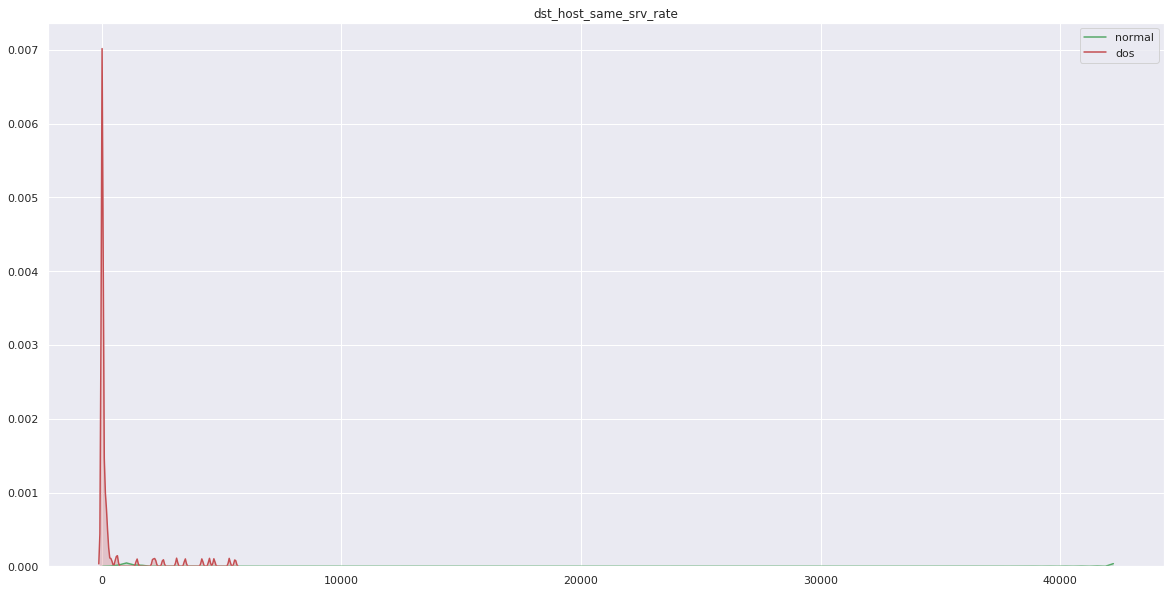

In [567]:
dst_host_same_srv_rate = data['dst_host_same_srv_rate']
attack = data['type_attack']


data_dst_host_same_srv_rate = pd.concat([dst_host_same_srv_rate, attack], axis=1)

normal_dst_host_same_srv_rate = data_dst_host_same_srv_rate[data_dst_host_same_srv_rate.type_attack == 'normal']
dos_dst_host_same_srv_rate= data_dst_host_same_srv_rate[data_dst_host_same_srv_rate.type_attack == 'dos']


sort_normal_dst_host_same_srv_rate = normal_dst_host_same_srv_rate.sort_values('dst_host_same_srv_rate', ascending=True)
sort_dos_dst_host_same_srv_rate = dos_dst_host_same_srv_rate.sort_values('dst_host_same_srv_rate', ascending=True)


count_normal_dst_host_same_srv_rate = sort_normal_dst_host_same_srv_rate['dst_host_same_srv_rate'].value_counts()
count_dos_dst_host_same_srv_rate = sort_dos_dst_host_same_srv_rate['dst_host_same_srv_rate'].value_counts()


data_dst_host_same_srv_rate2 = pd.concat([count_normal_dst_host_same_srv_rate, count_dos_dst_host_same_srv_rate], axis = 1)
data_dst_host_same_srv_rate2.columns =['normal','dos']


data_dst_host_same_srv_rate2 = data_dst_host_same_srv_rate2.fillna(0)
index = data_dst_host_same_srv_rate2.index.to_frame()
data_dst_host_same_srv_rate3 = pd.concat([data_dst_host_same_srv_rate2, index], axis=1)


data_dst_host_same_srv_rate3 = data_dst_host_same_srv_rate3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_dst_host_same_srv_rate3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_dst_host_same_srv_rate3['dos'], shade=True, color="r")
plt.title('dst_host_same_srv_rate')

# dst_host_diff_srv_rate	

In [0]:
# dst_host_diff_srv_rate	

Text(0.5, 1.0, 'dst_host_diff_srv_rate')

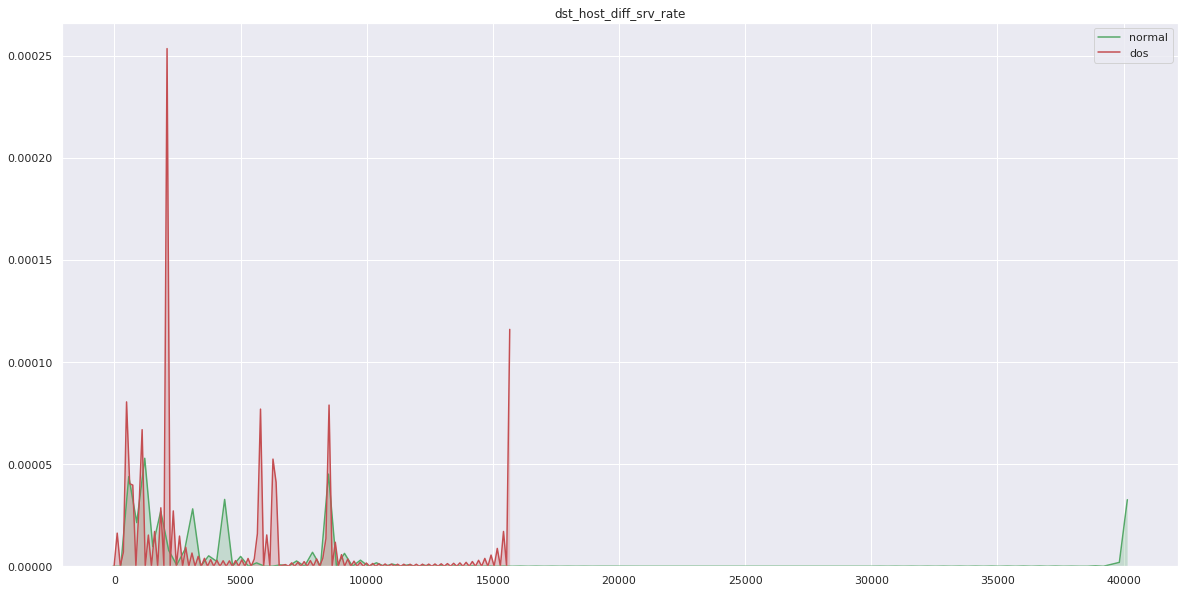

In [569]:
dst_host_diff_srv_rate = data['dst_host_diff_srv_rate']
attack = data['type_attack']


data_dst_host_diff_srv_rate = pd.concat([dst_host_diff_srv_rate, attack], axis=1)

normal_dst_host_diff_srv_rate = data_dst_host_diff_srv_rate[data_dst_host_diff_srv_rate.type_attack == 'normal']
dos_dst_host_diff_srv_rate= data_dst_host_diff_srv_rate[data_dst_host_diff_srv_rate.type_attack == 'dos']


sort_normal_dst_host_diff_srv_rate = normal_dst_host_diff_srv_rate.sort_values('dst_host_diff_srv_rate', ascending=True)
sort_dos_dst_host_diff_srv_rate = dos_dst_host_diff_srv_rate.sort_values('dst_host_diff_srv_rate', ascending=True)


count_normal_dst_host_diff_srv_rate = sort_normal_dst_host_diff_srv_rate['dst_host_diff_srv_rate'].value_counts()
count_dos_dst_host_diff_srv_rate = sort_dos_dst_host_diff_srv_rate['dst_host_diff_srv_rate'].value_counts()


data_dst_host_diff_srv_rate2 = pd.concat([count_normal_dst_host_diff_srv_rate, count_dos_dst_host_diff_srv_rate], axis = 1)
data_dst_host_diff_srv_rate2.columns =['normal','dos']


data_dst_host_diff_srv_rate2 = data_dst_host_diff_srv_rate2.fillna(0)
index = data_dst_host_diff_srv_rate2.index.to_frame()
data_dst_host_diff_srv_rate3 = pd.concat([data_dst_host_diff_srv_rate2, index], axis=1)


data_dst_host_diff_srv_rate3 = data_dst_host_diff_srv_rate3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_dst_host_diff_srv_rate3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_dst_host_diff_srv_rate3['dos'], shade=True, color="r")
plt.title('dst_host_diff_srv_rate')

# dst_host_same_src_port_rate	

In [0]:
# dst_host_same_src_port_rate	

Text(0.5, 1.0, 'dst_host_same_src_port_rate')

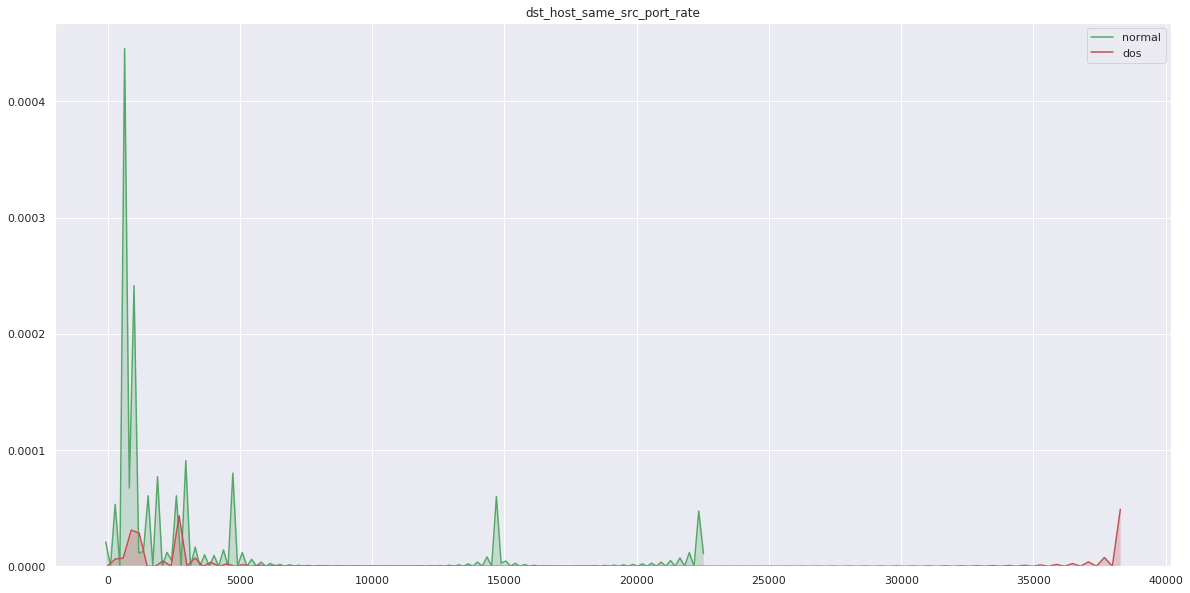

In [571]:
dst_host_same_src_port_rate = data['dst_host_same_src_port_rate']
attack = data['type_attack']


data_dst_host_same_src_port_rate = pd.concat([dst_host_same_src_port_rate, attack], axis=1)

normal_dst_host_same_src_port_rate = data_dst_host_same_src_port_rate[data_dst_host_same_src_port_rate.type_attack == 'normal']
dos_dst_host_same_src_port_rate= data_dst_host_same_src_port_rate[data_dst_host_same_src_port_rate.type_attack == 'dos']


sort_normal_dst_host_same_src_port_rate = normal_dst_host_same_src_port_rate.sort_values('dst_host_same_src_port_rate', ascending=True)
sort_dos_dst_host_same_src_port_rate = dos_dst_host_same_src_port_rate.sort_values('dst_host_same_src_port_rate', ascending=True)


count_normal_dst_host_same_src_port_rate = sort_normal_dst_host_same_src_port_rate['dst_host_same_src_port_rate'].value_counts()
count_dos_dst_host_same_src_port_rate = sort_dos_dst_host_same_src_port_rate['dst_host_same_src_port_rate'].value_counts()


data_dst_host_same_src_port_rate2 = pd.concat([count_normal_dst_host_same_src_port_rate, count_dos_dst_host_same_src_port_rate], axis = 1)
data_dst_host_same_src_port_rate2.columns =['normal','dos']


data_dst_host_same_src_port_rate2 = data_dst_host_same_src_port_rate2.fillna(0)
index = data_dst_host_same_src_port_rate2.index.to_frame()
data_dst_host_same_src_port_rate3 = pd.concat([data_dst_host_same_src_port_rate2, index], axis=1)


data_dst_host_same_src_port_rate3 = data_dst_host_same_src_port_rate3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_dst_host_same_src_port_rate3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_dst_host_same_src_port_rate3['dos'], shade=True, color="r")
plt.title('dst_host_same_src_port_rate')

# dst_host_srv_diff_host_rate	

In [0]:
# dst_host_srv_diff_host_rate	

Text(0.5, 1.0, 'dst_host_srv_diff_host_rate')

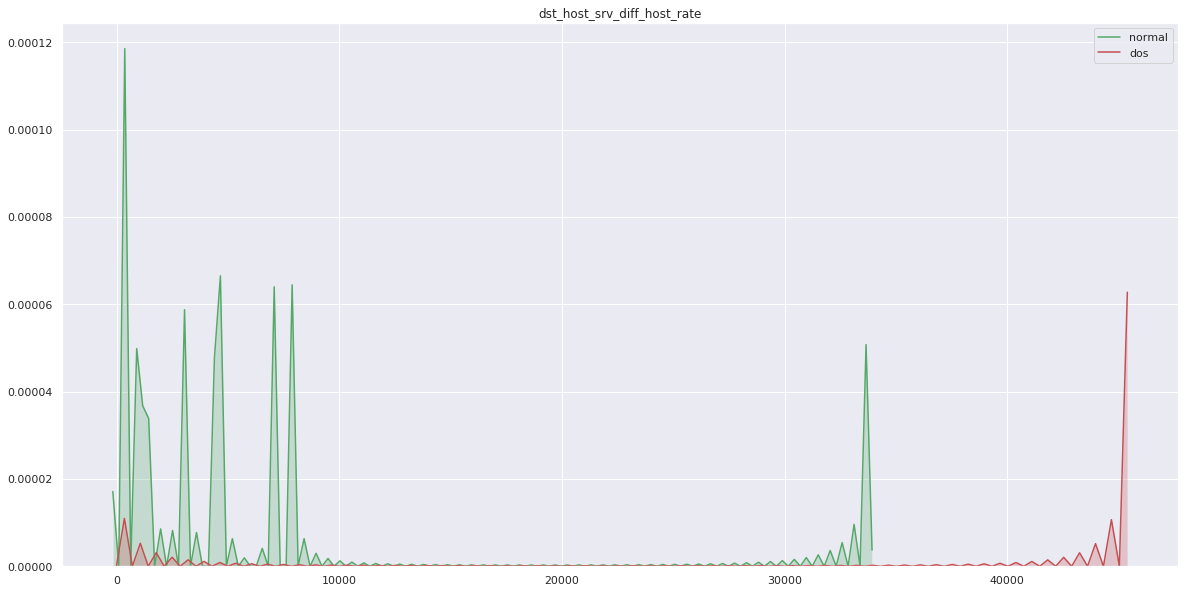

In [573]:
dst_host_srv_diff_host_rate = data['dst_host_srv_diff_host_rate']
attack = data['type_attack']


data_dst_host_srv_diff_host_rate = pd.concat([dst_host_srv_diff_host_rate, attack], axis=1)

normal_dst_host_srv_diff_host_rate = data_dst_host_srv_diff_host_rate[data_dst_host_srv_diff_host_rate.type_attack == 'normal']
dos_dst_host_srv_diff_host_rate= data_dst_host_srv_diff_host_rate[data_dst_host_srv_diff_host_rate.type_attack == 'dos']


sort_normal_dst_host_srv_diff_host_rate = normal_dst_host_srv_diff_host_rate.sort_values('dst_host_srv_diff_host_rate', ascending=True)
sort_dos_dst_host_srv_diff_host_rate = dos_dst_host_srv_diff_host_rate.sort_values('dst_host_srv_diff_host_rate', ascending=True)


count_normal_dst_host_srv_diff_host_rate = sort_normal_dst_host_srv_diff_host_rate['dst_host_srv_diff_host_rate'].value_counts()
count_dos_dst_host_srv_diff_host_rate = sort_dos_dst_host_srv_diff_host_rate['dst_host_srv_diff_host_rate'].value_counts()


data_dst_host_srv_diff_host_rate2 = pd.concat([count_normal_dst_host_srv_diff_host_rate, count_dos_dst_host_srv_diff_host_rate], axis = 1)
data_dst_host_srv_diff_host_rate2.columns =['normal','dos']


data_dst_host_srv_diff_host_rate2 = data_dst_host_srv_diff_host_rate2.fillna(0)
index = data_dst_host_srv_diff_host_rate2.index.to_frame()
data_dst_host_srv_diff_host_rate3 = pd.concat([data_dst_host_srv_diff_host_rate2, index], axis=1)


data_dst_host_srv_diff_host_rate3 = data_dst_host_srv_diff_host_rate3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_dst_host_srv_diff_host_rate3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_dst_host_srv_diff_host_rate3['dos'], shade=True, color="r")
plt.title('dst_host_srv_diff_host_rate')

# dst_host_serror_rate

In [0]:
# dst_host_serror_rate

Text(0.5, 1.0, 'dst_host_serror_rate')

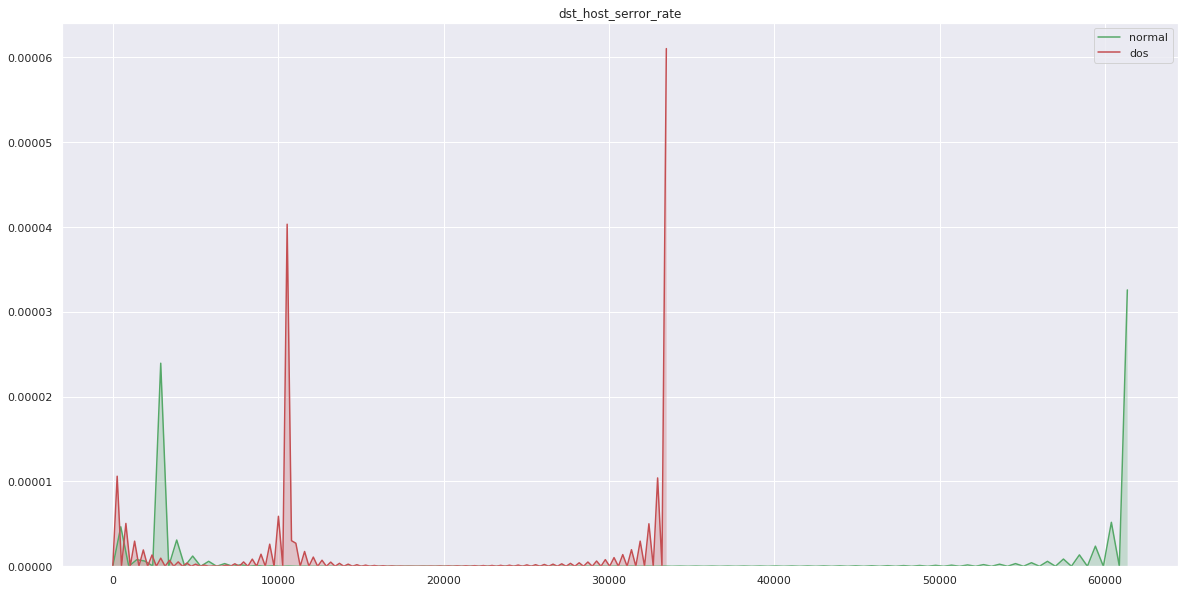

In [575]:
dst_host_serror_rate = data['dst_host_serror_rate']
attack = data['type_attack']


data_dst_host_serror_rate = pd.concat([dst_host_serror_rate, attack], axis=1)

normal_dst_host_serror_rate = data_dst_host_serror_rate[data_dst_host_serror_rate.type_attack == 'normal']
dos_dst_host_serror_rate= data_dst_host_serror_rate[data_dst_host_serror_rate.type_attack == 'dos']


sort_normal_dst_host_serror_rate = normal_dst_host_serror_rate.sort_values('dst_host_serror_rate', ascending=True)
sort_dos_dst_host_serror_rate = dos_dst_host_serror_rate.sort_values('dst_host_serror_rate', ascending=True)


count_normal_dst_host_serror_rate = sort_normal_dst_host_serror_rate['dst_host_serror_rate'].value_counts()
count_dos_dst_host_serror_rate = sort_dos_dst_host_serror_rate['dst_host_serror_rate'].value_counts()


data_dst_host_serror_rate2 = pd.concat([count_normal_dst_host_serror_rate, count_dos_dst_host_serror_rate], axis = 1)
data_dst_host_serror_rate2.columns =['normal','dos']


data_dst_host_serror_rate2 = data_dst_host_serror_rate2.fillna(0)
index = data_dst_host_serror_rate2.index.to_frame()
data_dst_host_serror_rate3 = pd.concat([data_dst_host_serror_rate2, index], axis=1)


data_dst_host_serror_rate3 = data_dst_host_serror_rate3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_dst_host_serror_rate3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_dst_host_serror_rate3['dos'], shade=True, color="r")
plt.title('dst_host_serror_rate')

# dst_host_srv_serror_rate	

In [0]:
# dst_host_srv_serror_rate	

Text(0.5, 1.0, 'dst_host_srv_serror_rate')

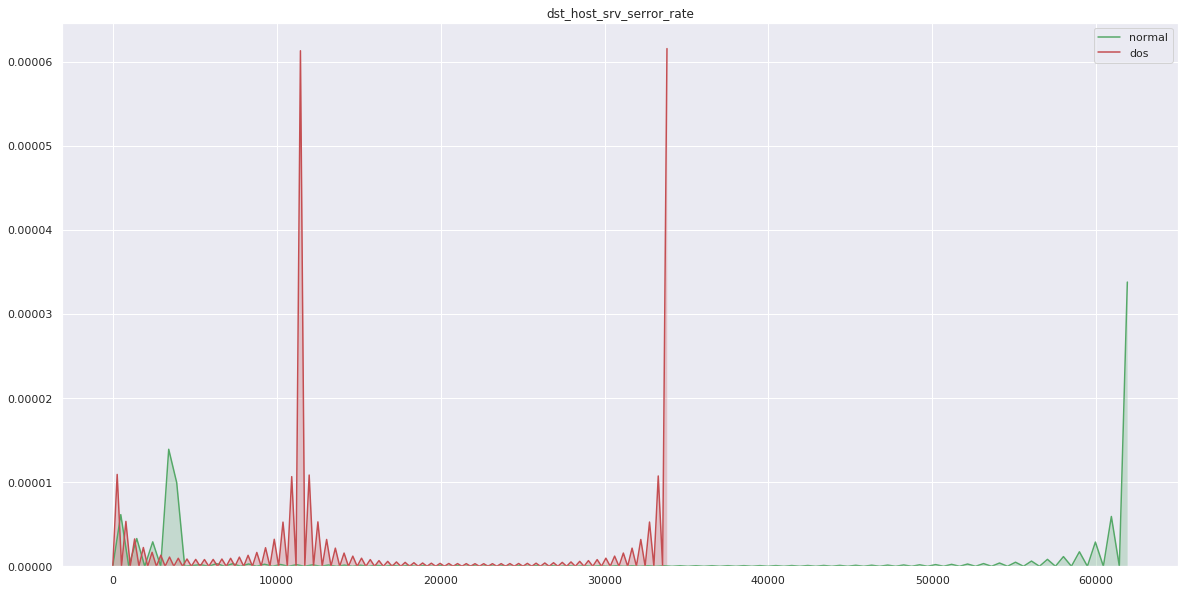

In [577]:
dst_host_srv_serror_rate = data['dst_host_srv_serror_rate']
attack = data['type_attack']


data_dst_host_srv_serror_rate = pd.concat([dst_host_srv_serror_rate, attack], axis=1)

normal_dst_host_srv_serror_rate = data_dst_host_srv_serror_rate[data_dst_host_srv_serror_rate.type_attack == 'normal']
dos_dst_host_srv_serror_rate= data_dst_host_srv_serror_rate[data_dst_host_srv_serror_rate.type_attack == 'dos']


sort_normal_dst_host_srv_serror_rate = normal_dst_host_srv_serror_rate.sort_values('dst_host_srv_serror_rate', ascending=True)
sort_dos_dst_host_srv_serror_rate = dos_dst_host_srv_serror_rate.sort_values('dst_host_srv_serror_rate', ascending=True)


count_normal_dst_host_srv_serror_rate = sort_normal_dst_host_srv_serror_rate['dst_host_srv_serror_rate'].value_counts()
count_dos_dst_host_srv_serror_rate = sort_dos_dst_host_srv_serror_rate['dst_host_srv_serror_rate'].value_counts()


data_dst_host_srv_serror_rate2 = pd.concat([count_normal_dst_host_srv_serror_rate, count_dos_dst_host_srv_serror_rate], axis = 1)
data_dst_host_srv_serror_rate2.columns =['normal','dos']


data_dst_host_srv_serror_rate2 = data_dst_host_srv_serror_rate2.fillna(0)
index = data_dst_host_srv_serror_rate2.index.to_frame()
data_dst_host_srv_serror_rate3 = pd.concat([data_dst_host_srv_serror_rate2, index], axis=1)


data_dst_host_srv_serror_rate3 = data_dst_host_srv_serror_rate3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_dst_host_srv_serror_rate3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_dst_host_srv_serror_rate3['dos'], shade=True, color="r")
plt.title('dst_host_srv_serror_rate')

# dst_host_rerror_rate	

In [0]:
# dst_host_rerror_rate	

Text(0.5, 1.0, 'dst_host_rerror_rate')

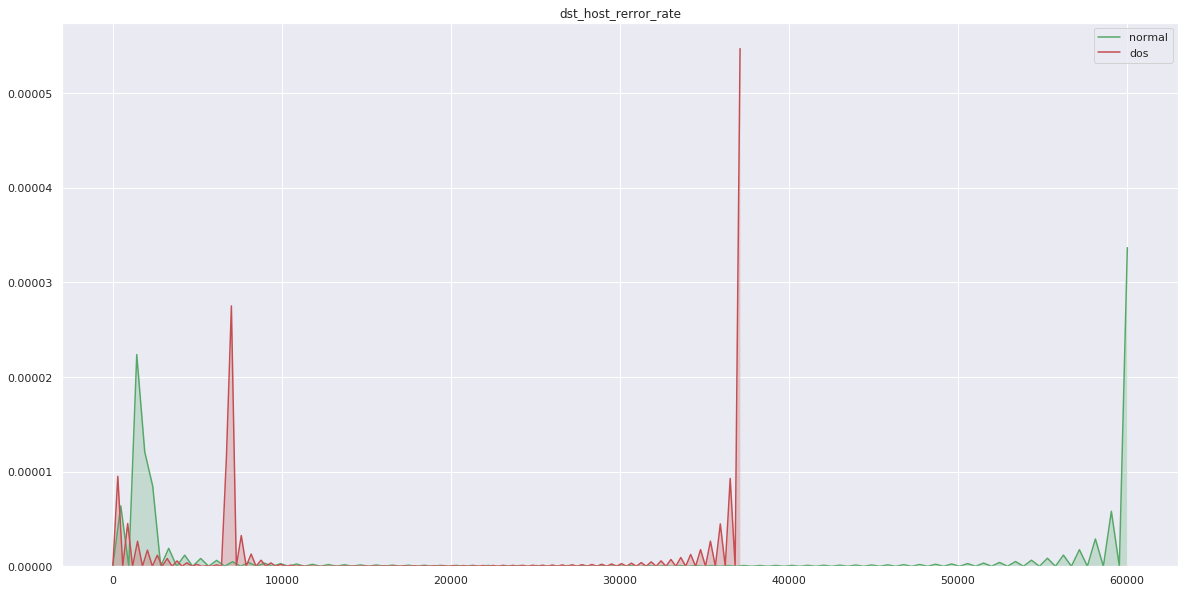

In [579]:
dst_host_rerror_rate = data['dst_host_rerror_rate']
attack = data['type_attack']


data_dst_host_rerror_rate = pd.concat([dst_host_rerror_rate, attack], axis=1)

normal_dst_host_rerror_rate = data_dst_host_rerror_rate[data_dst_host_rerror_rate.type_attack == 'normal']
dos_dst_host_rerror_rate= data_dst_host_rerror_rate[data_dst_host_rerror_rate.type_attack == 'dos']


sort_normal_dst_host_rerror_rate = normal_dst_host_rerror_rate.sort_values('dst_host_rerror_rate', ascending=True)
sort_dos_dst_host_rerror_rate = dos_dst_host_rerror_rate.sort_values('dst_host_rerror_rate', ascending=True)


count_normal_dst_host_rerror_rate = sort_normal_dst_host_rerror_rate['dst_host_rerror_rate'].value_counts()
count_dos_dst_host_rerror_rate = sort_dos_dst_host_rerror_rate['dst_host_rerror_rate'].value_counts()


data_dst_host_rerror_rate2 = pd.concat([count_normal_dst_host_rerror_rate, count_dos_dst_host_rerror_rate], axis = 1)
data_dst_host_rerror_rate2.columns =['normal','dos']


data_dst_host_rerror_rate2 = data_dst_host_rerror_rate2.fillna(0)
index = data_dst_host_rerror_rate2.index.to_frame()
data_dst_host_rerror_rate3 = pd.concat([data_dst_host_rerror_rate2, index], axis=1)


data_dst_host_rerror_rate3 = data_dst_host_rerror_rate3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_dst_host_rerror_rate3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_dst_host_rerror_rate3['dos'], shade=True, color="r")
plt.title('dst_host_rerror_rate')

# dst_host_srv_rerror_rate	

In [0]:
# dst_host_srv_rerror_rate	

Text(0.5, 1.0, 'dst_host_srv_rerror_rate')

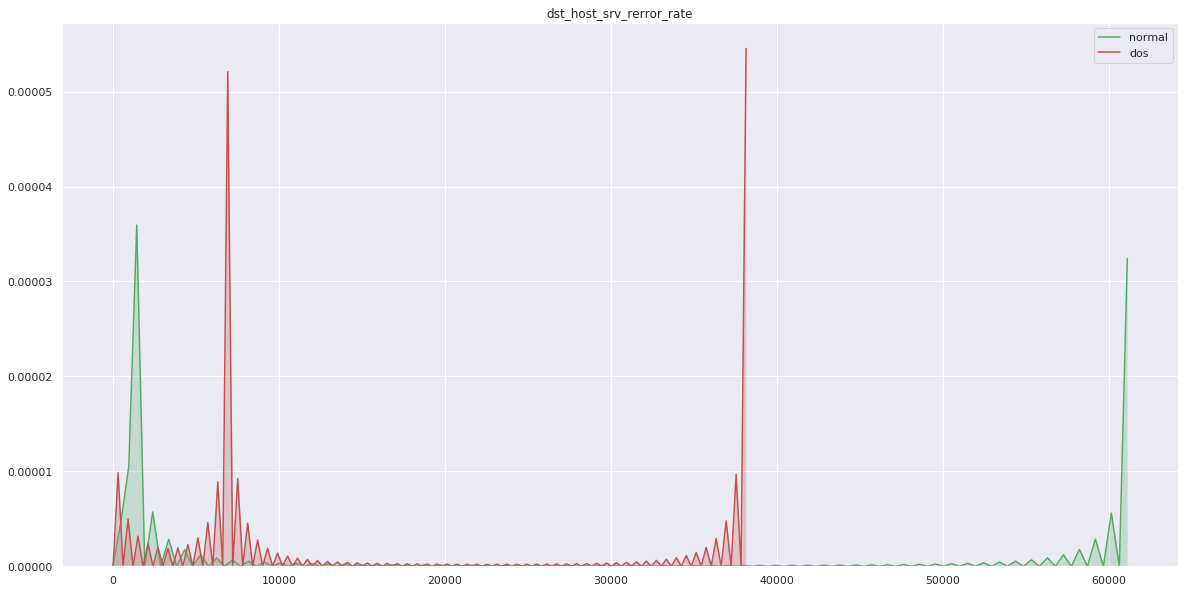

In [581]:
dst_host_srv_rerror_rate = data['dst_host_srv_rerror_rate']
attack = data['type_attack']


data_dst_host_srv_rerror_rate = pd.concat([dst_host_srv_rerror_rate, attack], axis=1)

normal_dst_host_srv_rerror_rate = data_dst_host_srv_rerror_rate[data_dst_host_srv_rerror_rate.type_attack == 'normal']
dos_dst_host_srv_rerror_rate= data_dst_host_srv_rerror_rate[data_dst_host_srv_rerror_rate.type_attack == 'dos']


sort_normal_dst_host_srv_rerror_rate = normal_dst_host_srv_rerror_rate.sort_values('dst_host_srv_rerror_rate', ascending=True)
sort_dos_dst_host_srv_rerror_rate = dos_dst_host_srv_rerror_rate.sort_values('dst_host_srv_rerror_rate', ascending=True)


count_normal_dst_host_srv_rerror_rate = sort_normal_dst_host_srv_rerror_rate['dst_host_srv_rerror_rate'].value_counts()
count_dos_dst_host_srv_rerror_rate = sort_dos_dst_host_srv_rerror_rate['dst_host_srv_rerror_rate'].value_counts()


data_dst_host_srv_rerror_rate2 = pd.concat([count_normal_dst_host_srv_rerror_rate, count_dos_dst_host_srv_rerror_rate], axis = 1)
data_dst_host_srv_rerror_rate2.columns =['normal','dos']


data_dst_host_srv_rerror_rate2 = data_dst_host_srv_rerror_rate2.fillna(0)
index = data_dst_host_srv_rerror_rate2.index.to_frame()
data_dst_host_srv_rerror_rate3 = pd.concat([data_dst_host_srv_rerror_rate2, index], axis=1)


data_dst_host_srv_rerror_rate3 = data_dst_host_srv_rerror_rate3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_dst_host_srv_rerror_rate3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_dst_host_srv_rerror_rate3['dos'], shade=True, color="r")
plt.title('dst_host_srv_rerror_rate')

# P.C.A

```
# Principal Component Analysis
```



In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [583]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,0,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,1,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,1,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,1,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,1,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


In [584]:
"""

COBA DENGAN DURATION DULU


"""

'\n\nCOBA DENGAN DURATION DULU\n\n\n'

Text(0.5, 1.0, 'duration')

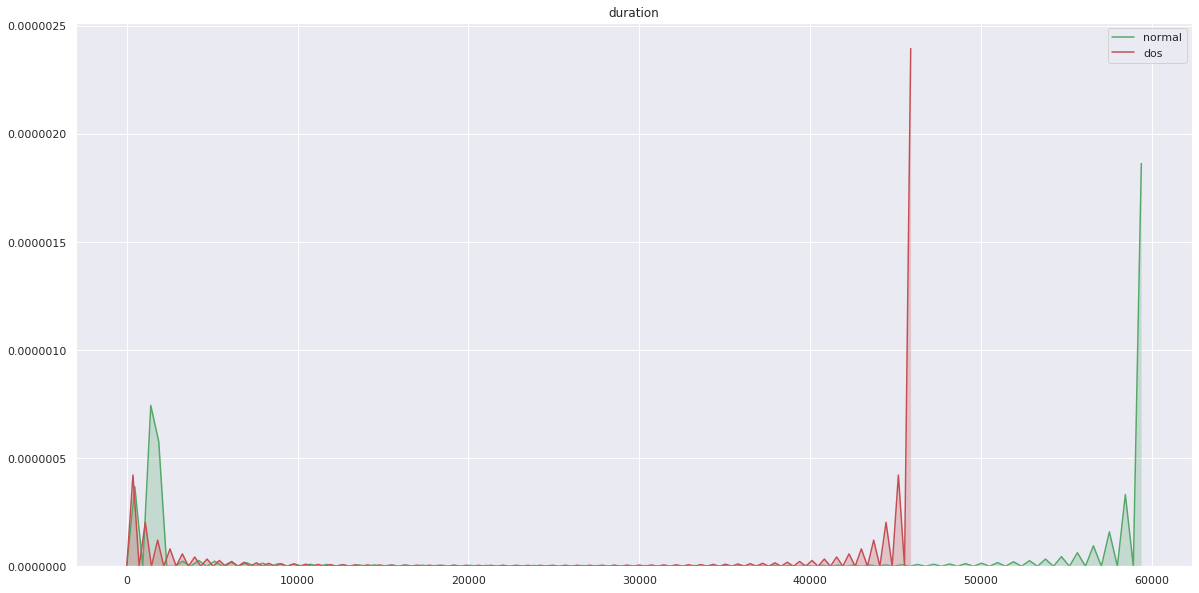

In [585]:
data_duration = data[['duration', 'type_attack']]

normal_duration = data_duration[data_duration.type_attack == 'normal']
dos_duration= data_duration[data_duration.type_attack == 'dos']


sort_normal_duration = normal_duration.sort_values('duration', ascending=True)
sort_dos_duration = dos_duration.sort_values('duration', ascending=True)


count_normal_duration = sort_normal_duration['duration'].value_counts()
count_dos_duration = sort_dos_duration['duration'].value_counts()


data_duration2 = pd.concat([count_normal_duration, count_dos_duration], axis = 1)
data_duration2.columns =['normal','dos']


data_duration2 = data_duration2.fillna(0)
index = data_duration2.index.to_frame()
data_duration3 = pd.concat([data_duration2, index], axis=1)


data_duration3 = data_duration3.rename(columns={0: 'value'})


plt.figure(figsize=(20,10))

ax =  sns.kdeplot(data_duration3['normal'], shade=True, color='g')
ax =  sns.kdeplot(data_duration3['dos'], shade=True, color="r")
plt.title('duration')

In [586]:
data_duration3.head()

,normal,dos,value
0,59385,45886.0,0
1,1648,7.0,1
2,717,4.0,2
3,479,0.0,3
4,278,2.0,4


In [587]:
data_duration3.shape

(1925, 3)

In [0]:
data_duration4 = data_duration3[['normal','dos']]

# Standardizing the features
x = data_duration4.values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['normal', 'dos'])

In [0]:
# finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

finalDF = principalDf

In [0]:
finalDF.reset_index(level=0, inplace=True)

In [591]:
finalDF

,index,normal,dos
0,0,62.015635,-0.016613
1,1,0.831105,0.853907
2,2,0.342799,0.369659
3,3,0.215783,0.248053
4,4,0.112149,0.141714
...,...,...,...
1920,1920,-0.033885,-0.001615
1921,1921,-0.033885,-0.001615
1922,1922,-0.033885,-0.001615
1923,1923,-0.033885,-0.001615


In [0]:
# create HISTOGRAM

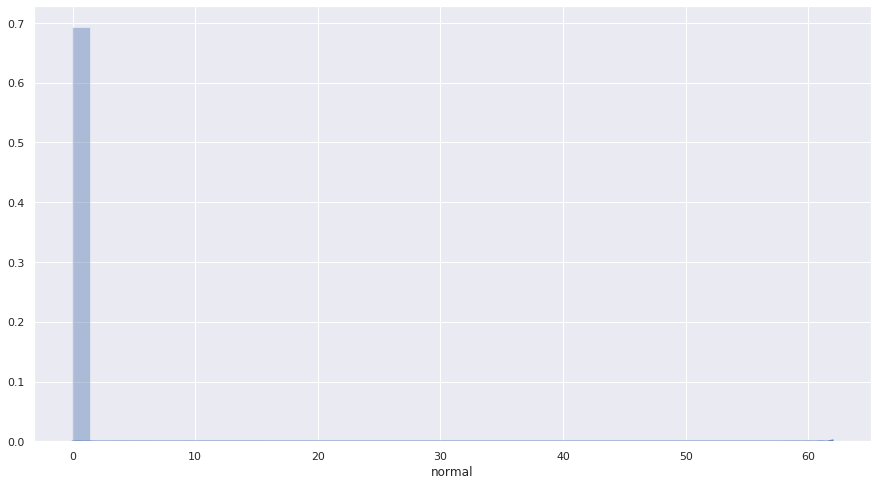

In [593]:
import seaborn as sns, numpy as np

plt.figure(figsize=(15,8))

sns.set()#
x = finalDF['normal']
ax = sns.distplot(x)

# PCA src_bytes

In [0]:
src_bytes = data['src_bytes']
attack = data['type_attack']


data_src_bytes = pd.concat([src_bytes, attack], axis=1)

normal_src_bytes = data_src_bytes[data_src_bytes.type_attack == 'normal']
dos_src_bytes= data_src_bytes[data_src_bytes.type_attack == 'dos']


sort_normal_src_bytes = normal_src_bytes.sort_values('src_bytes', ascending=True)
sort_dos_src_bytes = dos_src_bytes.sort_values('src_bytes', ascending=True)


count_normal_src_bytes = sort_normal_src_bytes['src_bytes'].value_counts()
count_dos_src_bytes = sort_dos_src_bytes['src_bytes'].value_counts()


data_src_bytes2 = pd.concat([count_normal_src_bytes, count_dos_src_bytes], axis = 1)
data_src_bytes2.columns =['normal','dos']


data_src_bytes2 = data_src_bytes2.fillna(0)
index = data_src_bytes2.index.to_frame()
data_src_bytes3 = pd.concat([data_src_bytes2, index], axis=1)


data_src_bytes3 = data_src_bytes3.rename(columns={0: 'value'})


# plt.figure(figsize=(20,10))

# ax =  sns.kdeplot(data_src_bytes3['normal'], shade=True, color='g')
# ax =  sns.kdeplot(data_src_bytes3['dos'], shade=True, color="r")
# plt.title('src_bytes')

In [595]:
data_src_bytes3.head()

,normal,dos,value
0,3415.0,41231.0,0
1,8.0,0.0,1
5,12.0,0.0,5
6,68.0,0.0,6
7,106.0,0.0,7


In [0]:
data_src_bytes4 = data_src_bytes3[['normal','dos']]

# Standardizing the features
x = data_src_bytes4.values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['normal', 'dos'])

# finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDF = principalDf

finalDF.reset_index(level=0, inplace=True)

In [597]:
finalDF.head()

,index,normal,dos
0,0,63.789552,17.539827
1,1,-0.097325,0.070029
2,2,-0.070077,0.042781
3,3,0.311396,-0.338692
4,4,0.570253,-0.597549


Text(0.5, 1.0, 'duration')

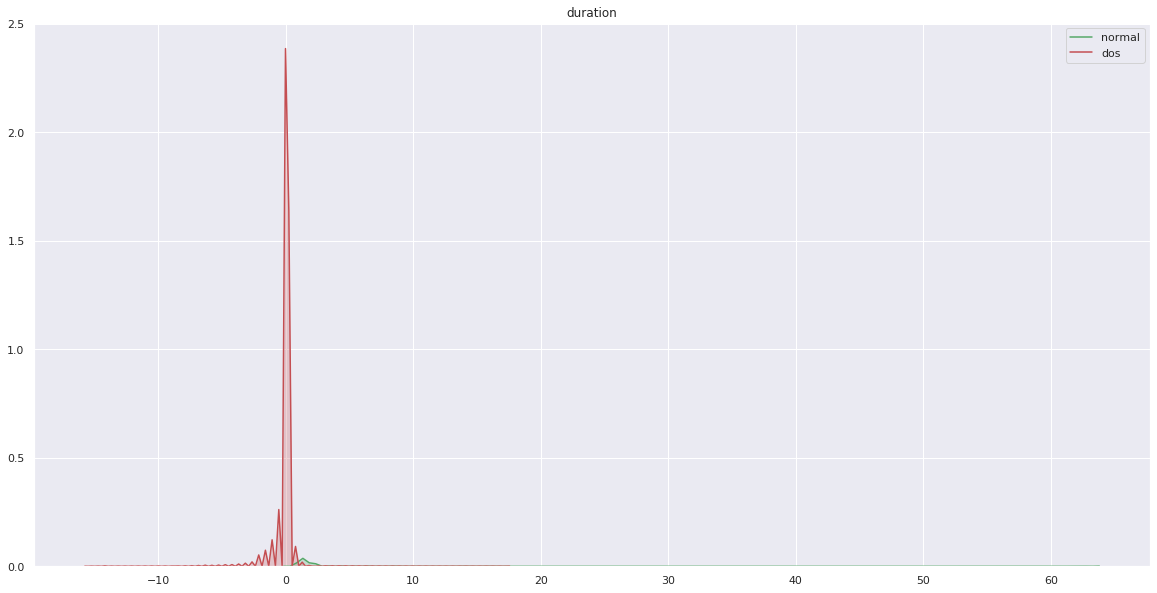

In [598]:
plt.figure(figsize=(20,10))

ax =  sns.kdeplot(finalDF['normal'], shade=True, color='g')
ax =  sns.kdeplot(finalDF['dos'], shade=True, color="r")
plt.title('duration')

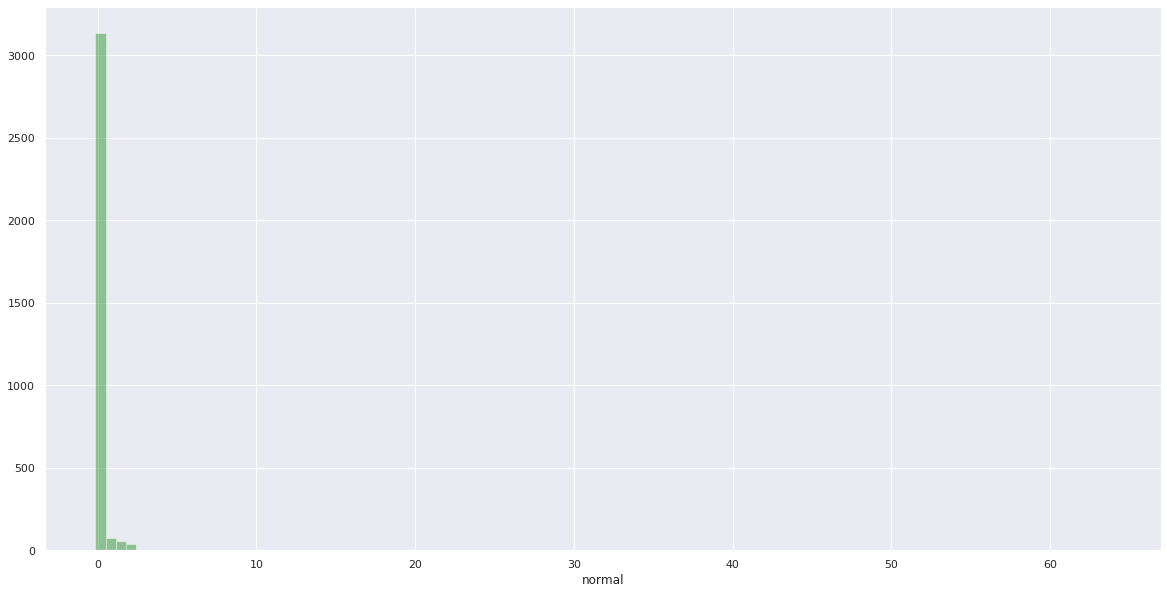

In [601]:
plt.figure(figsize=(20,10))

sns.distplot(finalDF['normal'], kde=False, color='green', bins=100)

Text(0, 0.5, 'Density')

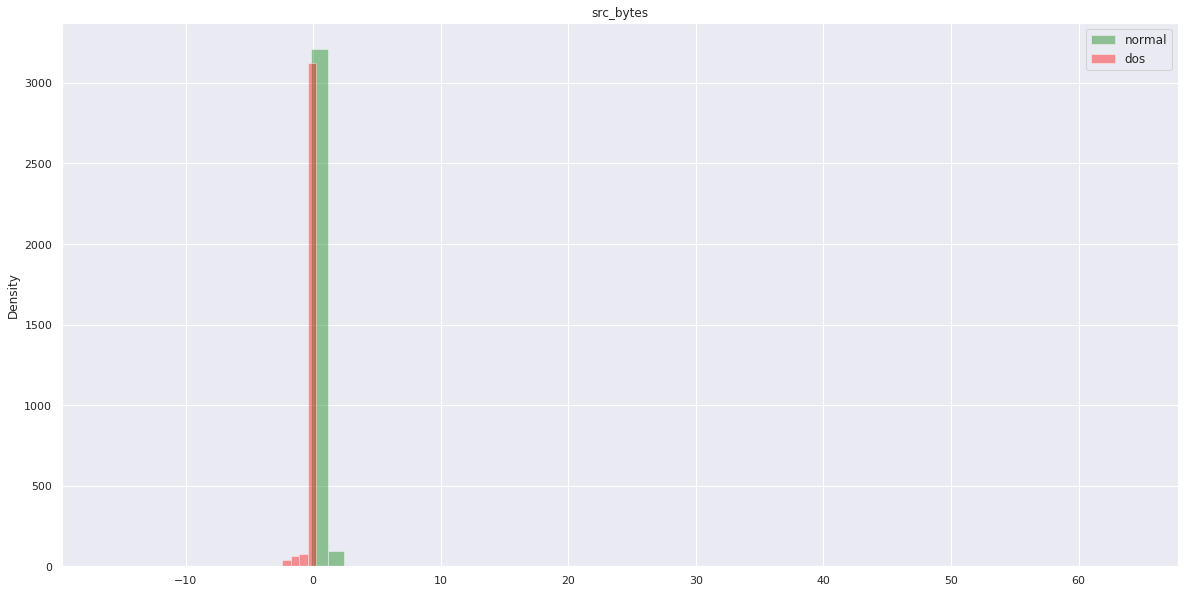

In [605]:
plt.figure(figsize=(20,10))

df = finalDF
sns.distplot(df['normal'], color='green', kde=False, label='normal')

df = finalDF
sns.distplot(finalDF['dos'], color='red', kde=False,label='dos')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('src_bytes')
plt.xlabel('')
plt.ylabel('Density')

# PCA error rate